In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def check_columns(df, df_test):
    extra_columns_df = [col for col in df.columns if col not in df_test.columns]
    extra_columns_df_test = [col for col in df_test.columns if col not in df.columns]
    if extra_columns_df or extra_columns_df_test:
        print("Extra_columns_in_df",extra_columns_df)
        '''print(extra_columns_df_test)'''
    else:
        return None


def check_columns_dtype(df,df_test):
    print(df.dtypes.value_counts())
    print()
    print(df_test.dtypes.value_counts())
    print()


def to_predict(df_sample):
    print("We have to predict the:",df_sample.columns)
    
    
    
def check_null_values(df,df_test):
    print("NUll values in the df:"), print(df.isnull().sum()),print()
    print("Null values in the df_test:"),print(df_test.isnull().sum()), print()
    
def size_of_dataset(df,df_test):
    print(f"Size of the train_dataset:, {df.shape}")
    print(f"Size of the train_dataset: {df_test.shape}"),print()
    print()

def unique_values(df, df_test):
    print("Unique_values in df")
    for column in df.columns:
        print(f"Number of unique values in '{column}' : {df[column].nunique()}")
    print("Unique_values in df_test"), print()
    for column in df_test.columns:
        print(f"Number of unique values in '{column}' : {df_test[column].nunique()}")

                                         
'''MAIN CDOE'''        

df= pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')
df_sample =pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')

check_columns(df, df_test), print(),print()
check_columns_dtype(df,df_test),print()
to_predict(df_sample), print(), print()
check_null_values(df,df_test)
size_of_dataset(df,df_test)
unique_values(df,df_test)

Extra_columns_in_df ['Premium Amount']


object     11
float64     9
int64       1
Name: count, dtype: int64

object     11
float64     8
int64       1
Name: count, dtype: int64


We have to predict the: Index(['id', 'Premium Amount'], dtype='object')


NUll values in the df:
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

Null values in the df_test:
id                           0

In [124]:
object_columns = df.select_dtypes(include=['object']).drop(columns=['Policy Start Date'])

# Iterate and print unique values for object columns
for column in object_columns.columns:
    unique_values = object_columns[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Marital Status': ['Married' 'Divorced' 'Single' nan]
Unique values in column 'Education Level': ["Bachelor's" "Master's" 'High School' 'PhD']
Unique values in column 'Occupation': ['Self-Employed' nan 'Employed' 'Unemployed']
Unique values in column 'Location': ['Urban' 'Rural' 'Suburban']
Unique values in column 'Policy Type': ['Premium' 'Comprehensive' 'Basic']
Unique values in column 'Customer Feedback': ['Poor' 'Average' 'Good' nan]
Unique values in column 'Smoking Status': ['No' 'Yes']
Unique values in column 'Exercise Frequency': ['Weekly' 'Monthly' 'Daily' 'Rarely']
Unique values in column 'Property Type': ['House' 'Apartment' 'Condo']


In [125]:
"""NUll values in the df:
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64"""

'NUll values in the df:\nid                           0\nAge                      18705\nGender                       0\nAnnual Income            44949\nMarital Status           18529\nNumber of Dependents    109672\nEducation Level              0\nOccupation              358075\nHealth Score             74076\nLocation                     0\nPolicy Type                  0\nPrevious Claims         364029\nVehicle Age                  6\nCredit Score            137882\nInsurance Duration           1\nPolicy Start Date            0\nCustomer Feedback        77824\nSmoking Status               0\nExercise Frequency           0\nProperty Type                0\nPremium Amount               0\ndtype: int64'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


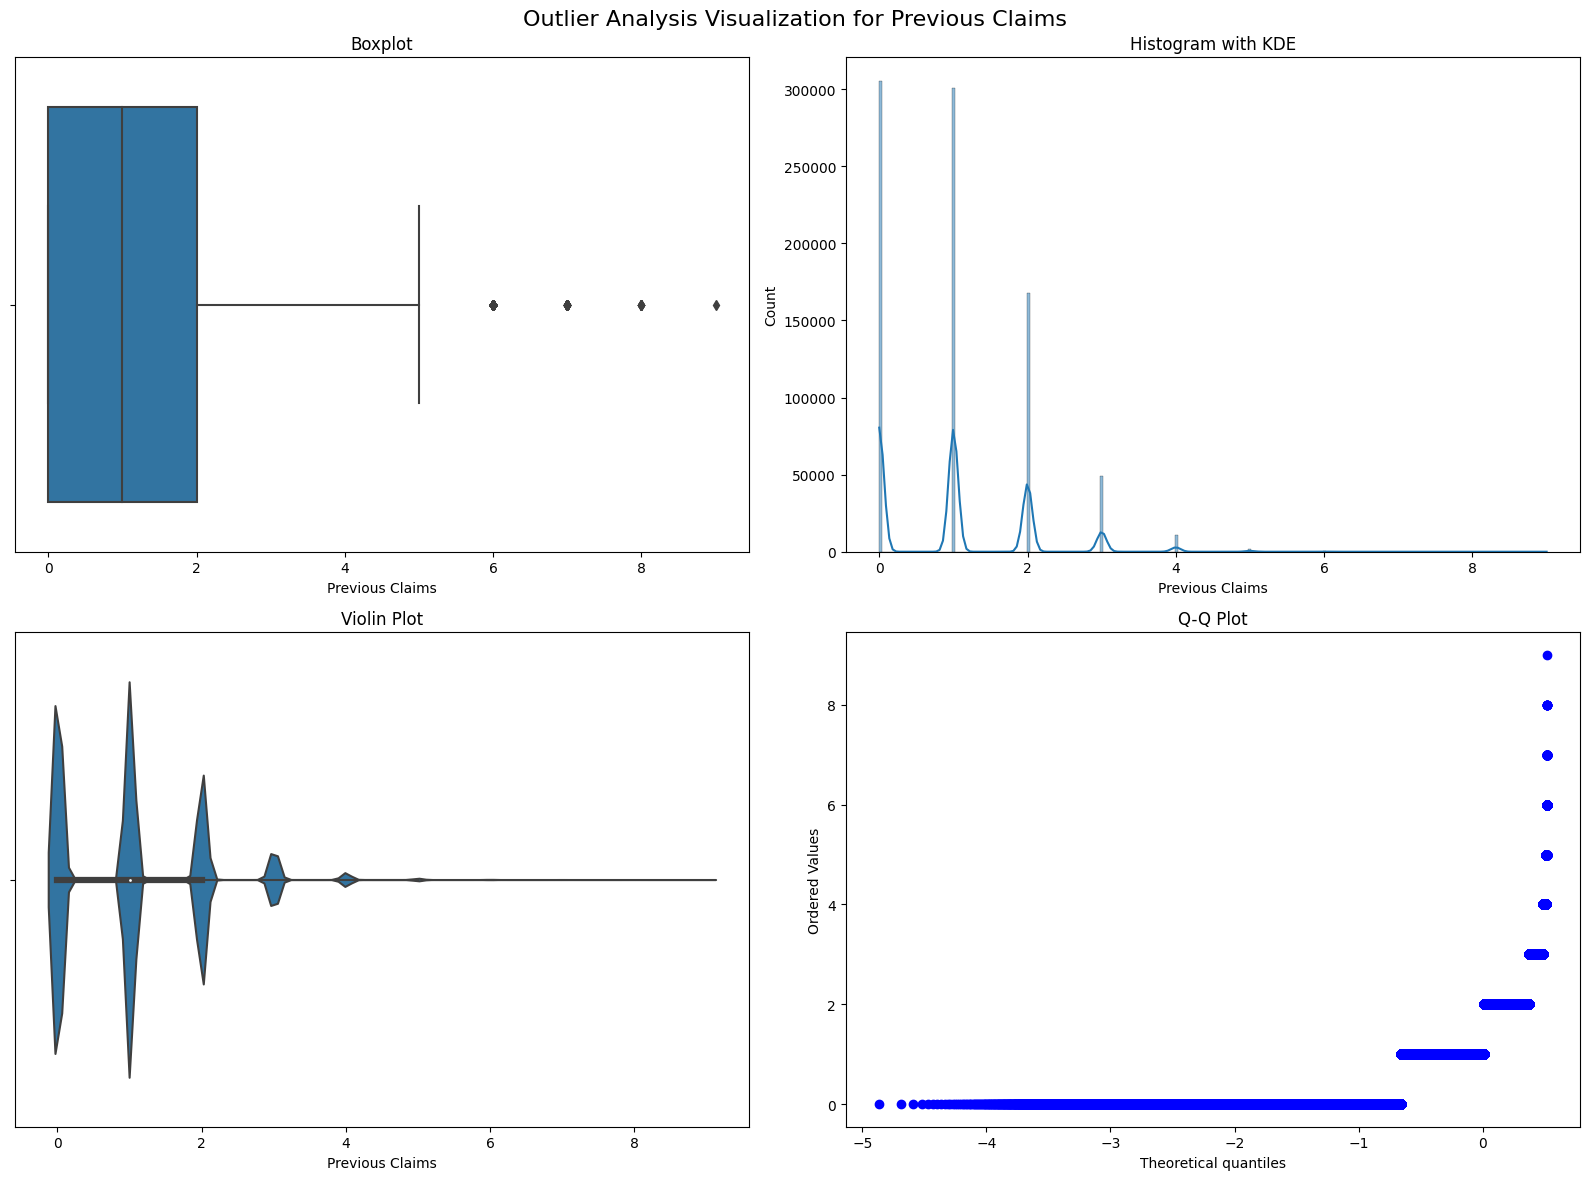

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


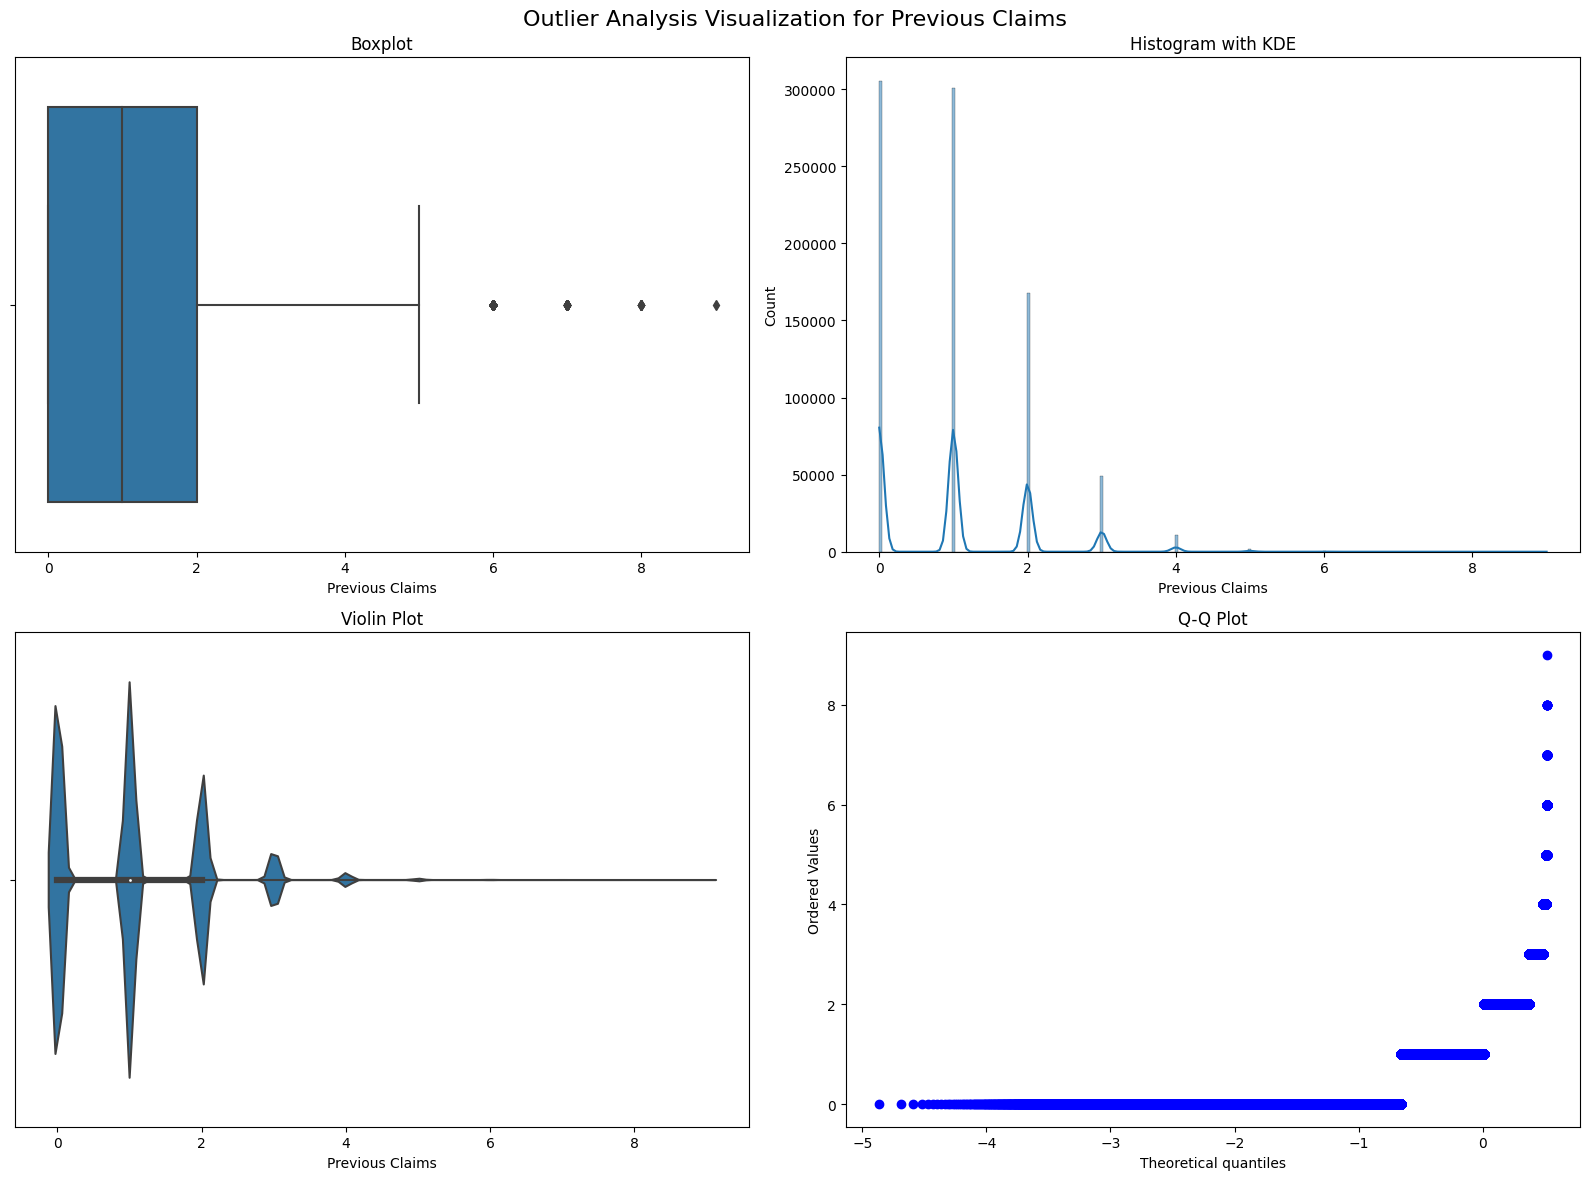

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


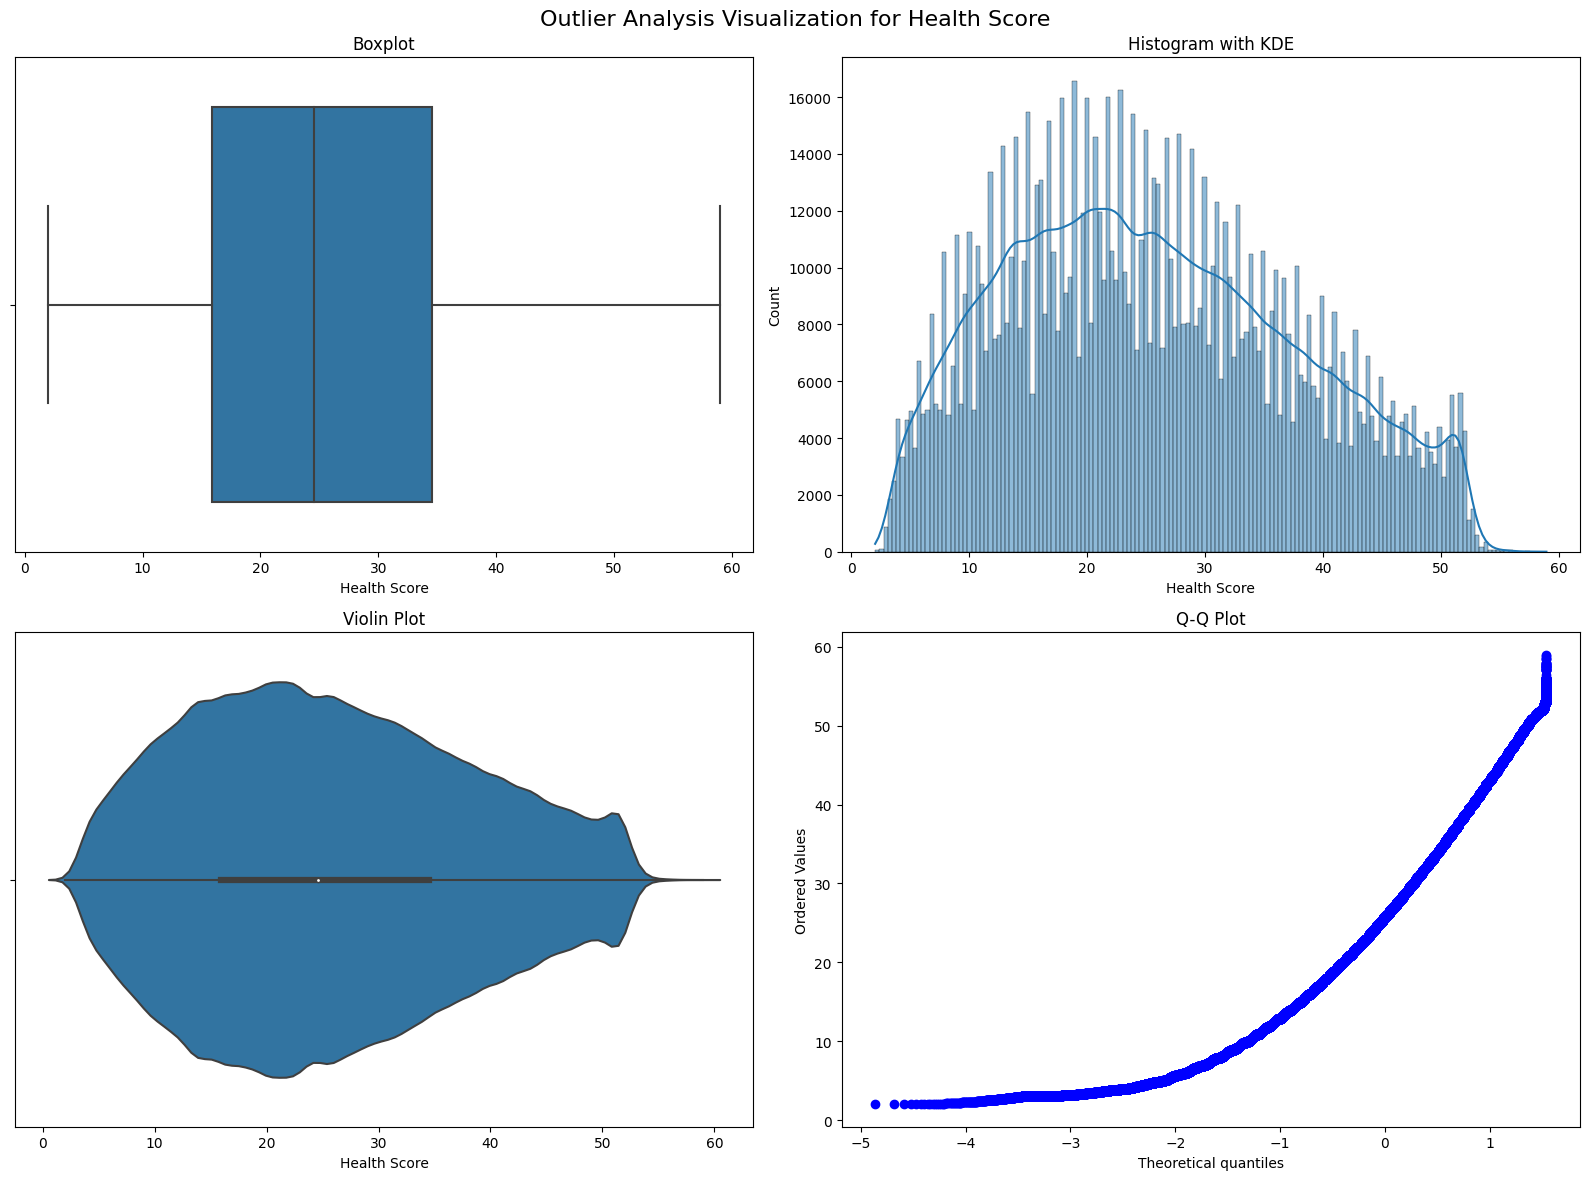

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


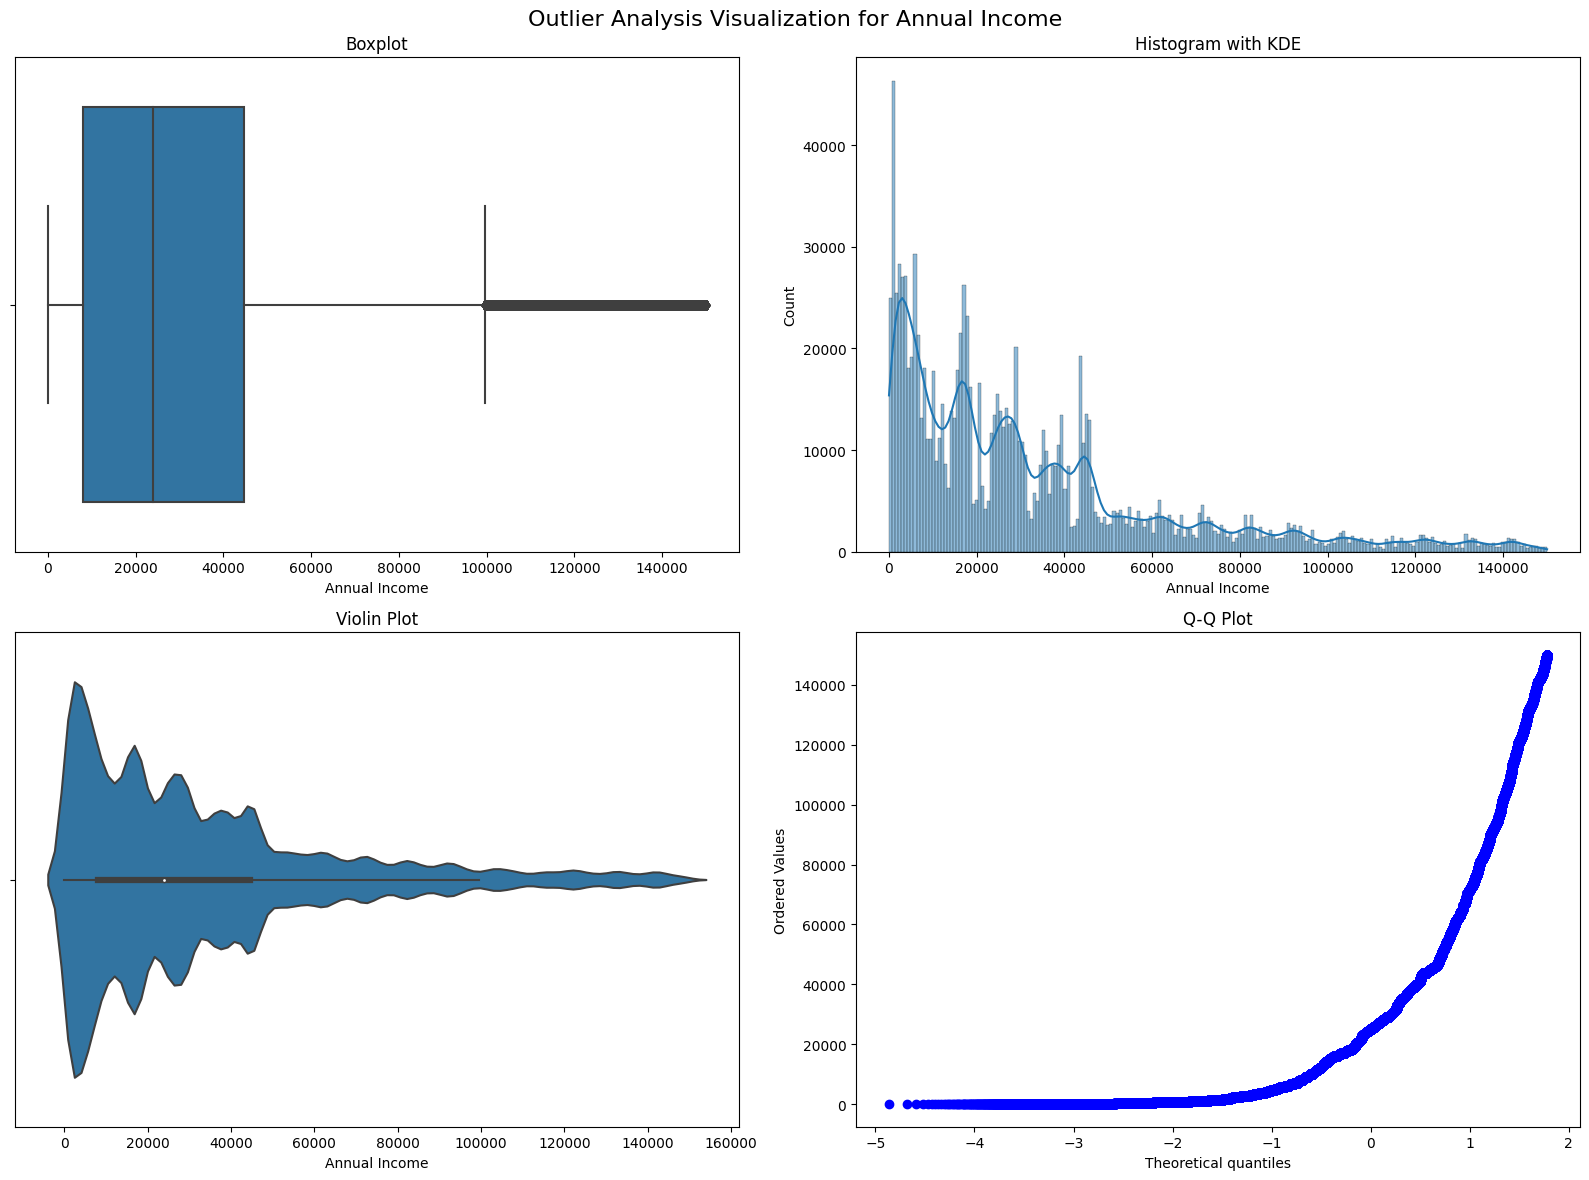

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def comprehensive_outlier_visualization(df, column):
    # Validate column exists
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame")
        return
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Outlier Analysis Visualization for {column}', fontsize=16)
    
    # 1. Boxplot (Top Left)
    sns.boxplot(x=df[column], ax=axes[0, 0])
    axes[0, 0].set_title('Boxplot')
    
    # 2. Violin Plot (Bottom Left)
    sns.violinplot(x=df[column], ax=axes[1, 0])
    axes[1, 0].set_title('Violin Plot')
    
    # 3. Histogram with KDE (Top Right)
    sns.histplot(df[column], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Histogram with KDE')
    
    # 4. Q-Q Plot (Bottom Right)
    stats.probplot(df[column], plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Alternative approach with error handling
def visualize_outliers(df, columns_list):
    """
    Visualize outliers for multiple columns with error handling
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    columns_list (list): List of column names to analyze
    """
    # Validate input
    if not isinstance(columns_list, list):
        columns_list = [columns_list]
    
    # Find valid columns
    valid_columns = [col for col in columns_list if col in df.columns]
    
    # Check if any valid columns exist
    if not valid_columns:
        print("No valid columns found for visualization")
        return
    
    # Visualize each valid column
    for column in valid_columns:
        comprehensive_outlier_visualization(df, column)

# Usage examples
try:
    # Method 1: Single column
    comprehensive_outlier_visualization(df, 'Previous Claims')
    
    # Method 2: Multiple columns with error handling
    columns_to_check = ['Previous Claims', 'Health Score', 'Annual Income']
    visualize_outliers(df, columns_to_check)

except Exception as e:
    print(f"An error occurred: {e}")

In [127]:
"""
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Marital Status': ['Married' 'Divorced' 'Single' nan]
Unique values in column 'Education Level': ["Bachelor's" "Master's" 'High School' 'PhD']
Unique values in column 'Occupation': ['Self-Employed' nan 'Employed' 'Unemployed']
Unique values in column 'Location': ['Urban' 'Rural' 'Suburban']
Unique values in column 'Policy Type': ['Premium' 'Comprehensive' 'Basic']
Unique values in column 'Customer Feedback': ['Poor' 'Average' 'Good' nan]
Unique values in column 'Smoking Status': ['No' 'Yes']
Unique values in column 'Exercise Frequency': ['Weekly' 'Monthly' 'Daily' 'Rarely']
Unique values in column 'Property Type': ['House' 'Apartment' 'Condo']

NUll values in the df:
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64"""

'\nUnique values in column \'Gender\': [\'Female\' \'Male\']\nUnique values in column \'Marital Status\': [\'Married\' \'Divorced\' \'Single\' nan]\nUnique values in column \'Education Level\': ["Bachelor\'s" "Master\'s" \'High School\' \'PhD\']\nUnique values in column \'Occupation\': [\'Self-Employed\' nan \'Employed\' \'Unemployed\']\nUnique values in column \'Location\': [\'Urban\' \'Rural\' \'Suburban\']\nUnique values in column \'Policy Type\': [\'Premium\' \'Comprehensive\' \'Basic\']\nUnique values in column \'Customer Feedback\': [\'Poor\' \'Average\' \'Good\' nan]\nUnique values in column \'Smoking Status\': [\'No\' \'Yes\']\nUnique values in column \'Exercise Frequency\': [\'Weekly\' \'Monthly\' \'Daily\' \'Rarely\']\nUnique values in column \'Property Type\': [\'House\' \'Apartment\' \'Condo\']\n\nNUll values in the df:\nid                           0\nAge                      18705\nGender                       0\nAnnual Income            44949\nMarital Status           18

In [128]:
# """Features with Missing Data: Number of Dependents, Credit Score
# Features with Outliers: Previous Claims, Health Score, Annual Income
# Features with Skewness: Annual Income, Health Score, Premium Amount
# Features Requiring Special Preprocessing: Policy Start Date, Customer Feedback"""

In [129]:
# Ordinal encoding onn Gender
# Fill missing values of Annual Income with median

# skewnes: annual income, healthg score, premium ammount


In [130]:
# # if right skewed then median and if left skewed 
# Credit Score: mean
# Health Score: mean
# Annual Income: median
# Number of dependents: mean
# Age: mean

# oridinal encoding of Gender: Female with 0, male with 1
# oridinal encoding of Martial Status: Married with 2, Divorced with 1 , Single with 1 
# oridinal encoding of Education Level:High School with 0, Bachelors with 1, Masters with 2,  PhD with 3 
# Encoding of Location: Rural with 0, sub-urban with 1 , urban with 2 
# oridinal encoding of Smoking Status: No with 0 , yes with 1 

# Exercise Frequency: ['Weekly' with 4, 'Monthly' with 1 ,  'Daily' with 28,  'Rarely' with 0.5
# oridinal encoding of Property Type:['House' with 2 'Apartment' with 1 'Condo' with 0 ]
# oridinal encoding of Policy Type:  ['Premium'  with 2  'Comprehensive' with 1 'Basic' with 0]
# 'Occupation': ['Self-Employed' with 6 with ,nan with nan 'Employed' with 4 'Unemployed' with 2]
# Customer Feedback': ['Poor' with 0  'Average' with 5  'Good' with 10, nan  with nan]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

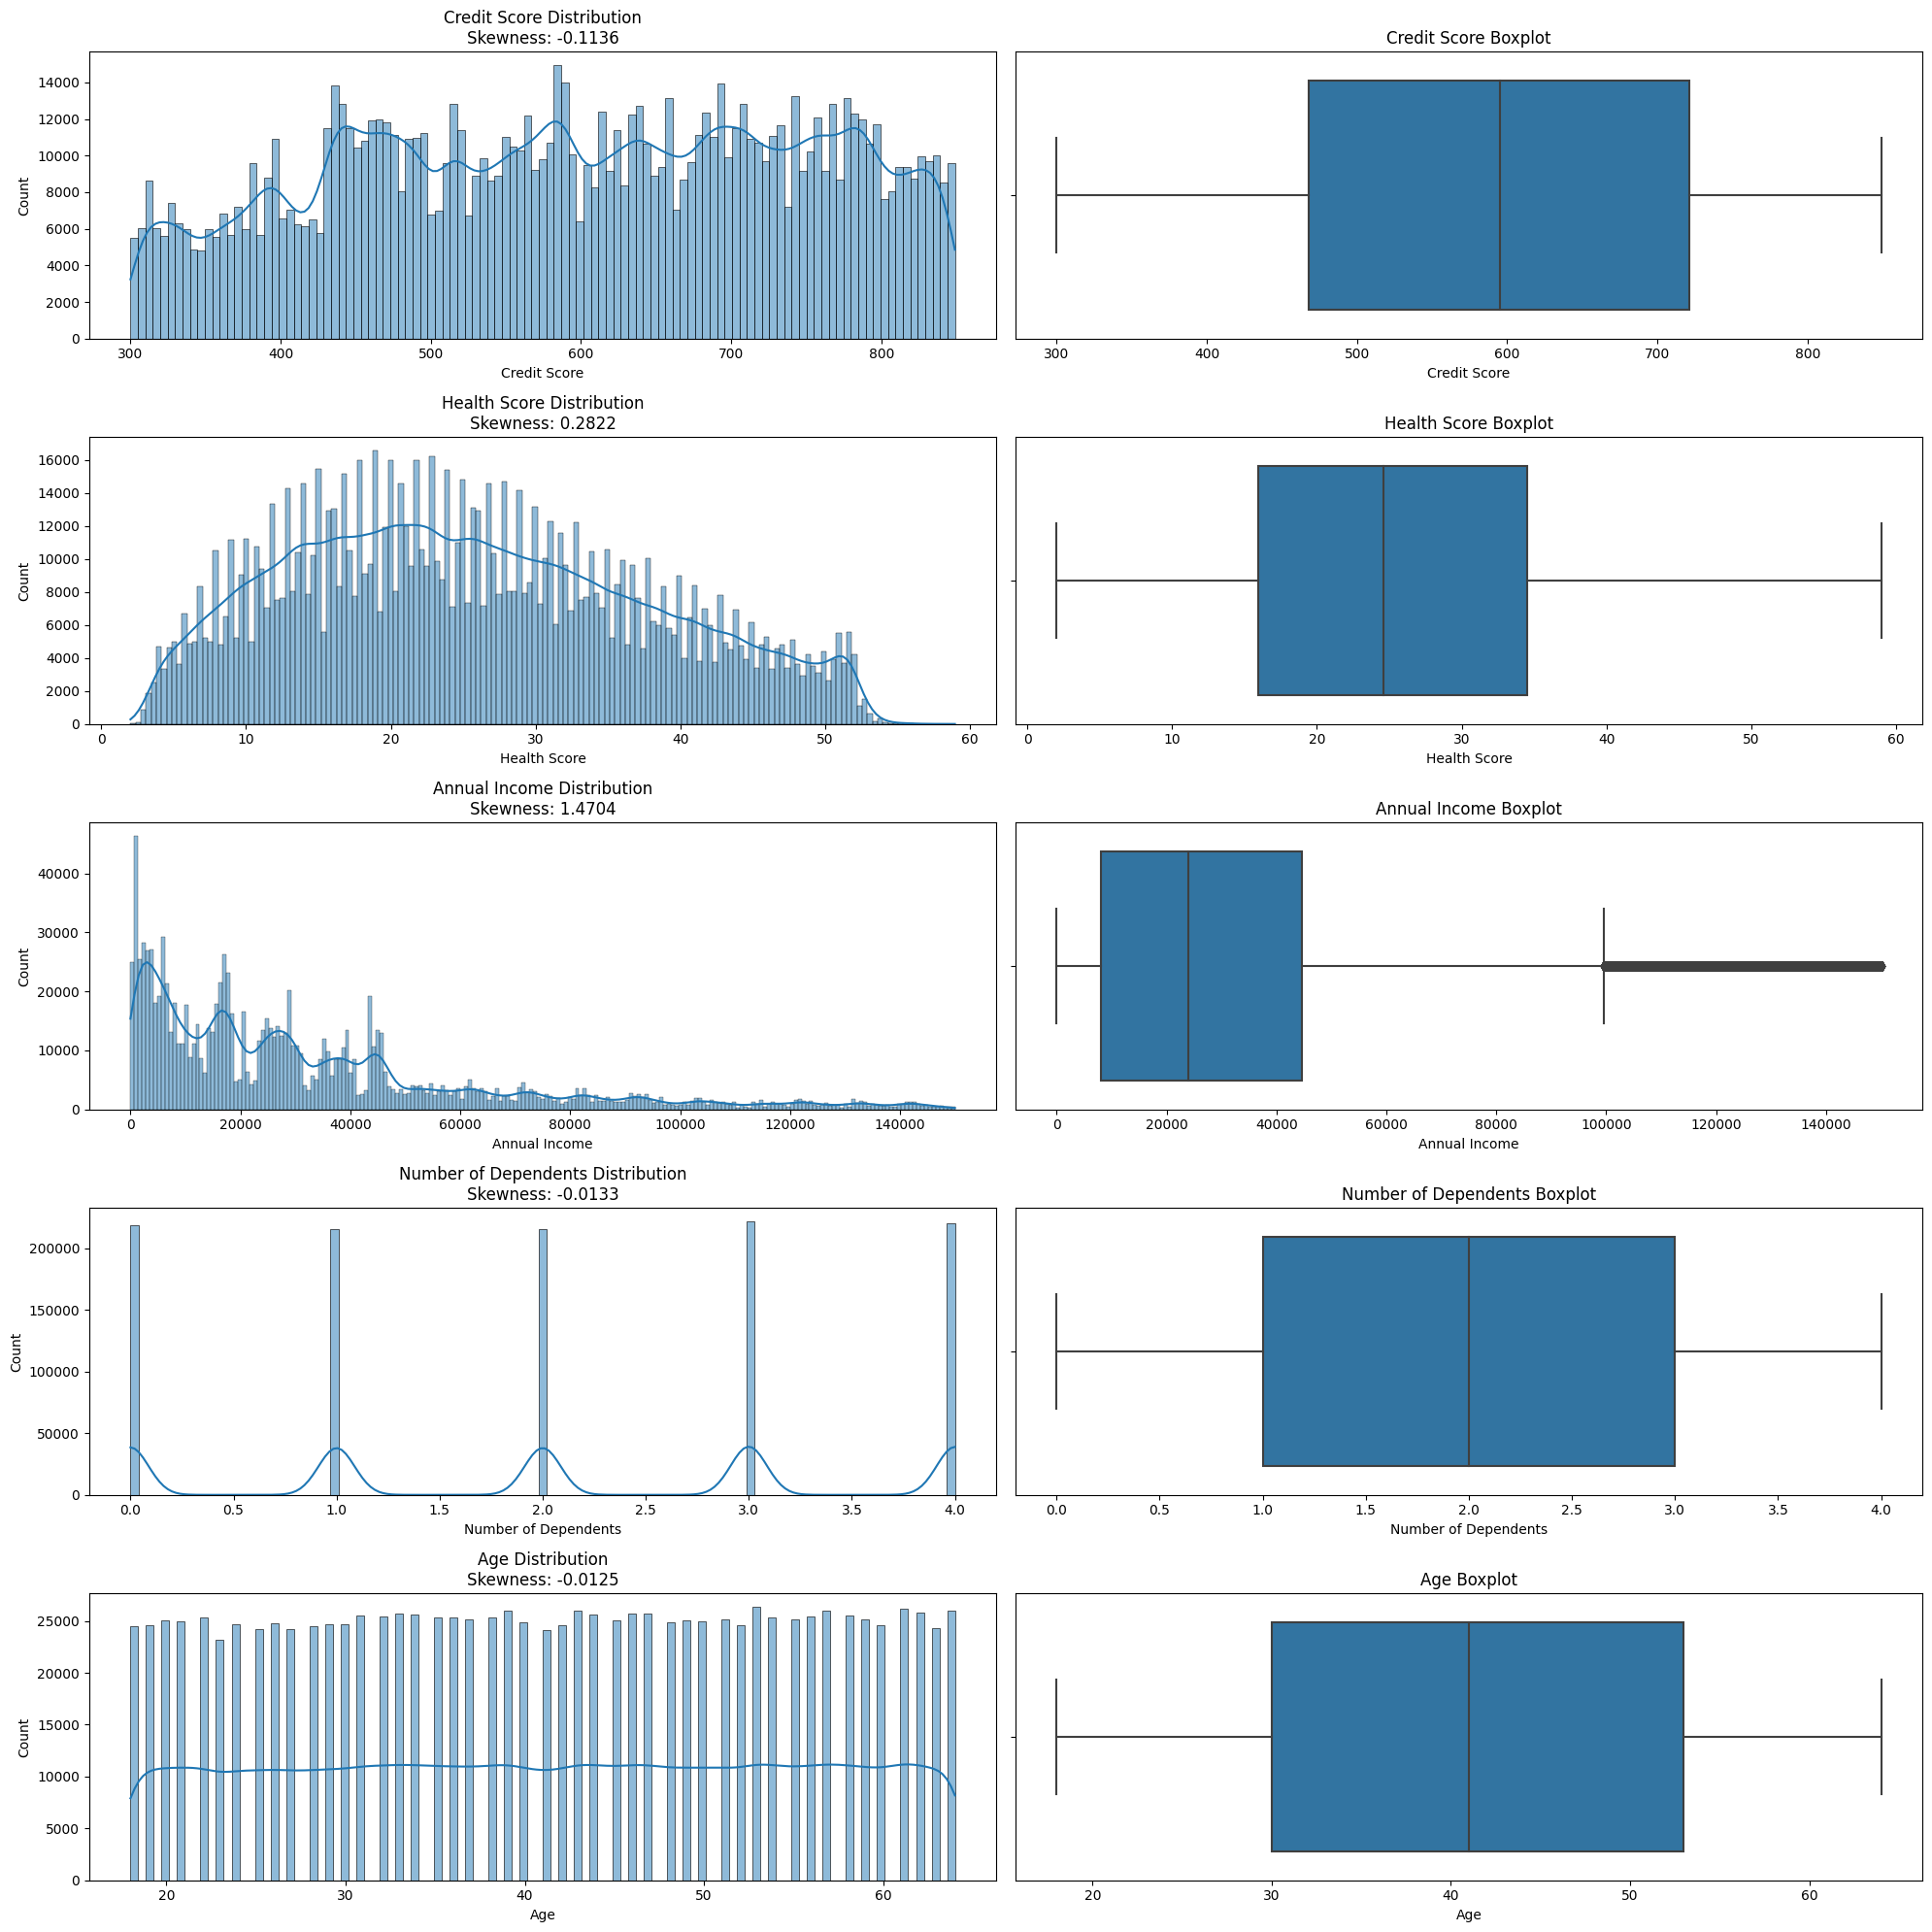


--- Skewness Analysis Report ---

Credit Score:
Skewness Value: -0.1136
Skewness Type: Approximately Symmetric
Recommended Metric: Mean

Health Score:
Skewness Value: 0.2822
Skewness Type: Approximately Symmetric
Recommended Metric: Mean

Annual Income:
Skewness Value: 1.4704
Skewness Type: Highly Right Skewed
Recommended Metric: Median

Number of Dependents:
Skewness Value: -0.0133
Skewness Type: Approximately Symmetric
Recommended Metric: Mean

Age:
Skewness Value: -0.0125
Skewness Type: Approximately Symmetric
Recommended Metric: Mean


In [131]:
def analyze_skewness(df, features):
    """
    Analyze skewness for specified features
    
    Parameters:
    - df: Input DataFrame
    - features: List of column names to analyze
    
    Returns:
    - Dictionary with skewness details
    """
    skewness_results = {}
    
    plt.figure(figsize=(20, 4 * len(features)))
    
    for idx, feature in enumerate(features, 1):
        # Calculate Skewness
        skewness = df[feature].skew()
        
        # Determine Skewness Type
        if skewness > 1:
            skew_type = "Highly Right Skewed"
            recommended_metric = "Median"
        elif skewness < -1:
            skew_type = "Highly Left Skewed"
            recommended_metric = "Mode"
        elif skewness > 0.5:
            skew_type = "Moderately Right Skewed"
            recommended_metric = "Median"
        elif skewness < -0.5:
            skew_type = "Moderately Left Skewed"
            recommended_metric = "Mode"
        else:
            skew_type = "Approximately Symmetric"
            recommended_metric = "Mean"
        
        # Store Results
        skewness_results[feature] = {
            'skewness_value': skewness,
            'skewness_type': skew_type,
            'recommended_metric': recommended_metric
        }
        
        # Visualization
        plt.subplot(len(features), 2, 2*idx-1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'{feature} Distribution\nSkewness: {skewness:.4f}')
        
        # Box Plot
        plt.subplot(len(features), 2, 2*idx)
        sns.boxplot(x=df[feature])
        plt.title(f'{feature} Boxplot')
    
    plt.tight_layout()
    plt.show()
    
    return skewness_results

def print_skewness_report(skewness_results):
    """
    Print detailed skewness report
    
    Parameters:
    - skewness_results: Dictionary of skewness analysis results
    """
    print("\n--- Skewness Analysis Report ---")
    for feature, details in skewness_results.items():
        print(f"\n{feature}:")
        print(f"Skewness Value: {details['skewness_value']:.4f}")
        print(f"Skewness Type: {details['skewness_type']}")
        print(f"Recommended Metric: {details['recommended_metric']}")

# Main Execution
def main(df):
    # Features to Analyze
    features = [
        'Credit Score', 
        'Health Score', 
        'Annual Income', 
        'Number of Dependents', 
        'Age'
    ]
    
    # Perform Skewness Analysis
    skewness_results = analyze_skewness(df, features)
    
    # Print Detailed Report
    print_skewness_report(skewness_results)
    
    return skewness_results

# Usage
skewness_results = main(df)

In [132]:
import pandas as pd
import numpy as np

# Define encoding mappings globally
ENCODING_MAPPINGS = {
    'Gender': {
        'Female': 0, 
        'Male': 1
    },
    'Marital Status': {
        'Married': 2, 
        'Divorced': 1, 
        'Single': 0,
        np.nan: np.nan
    },
    'Education Level': {
        'High School': 0, 
        "Bachelor's": 1, 
        "Master's": 2, 
        'PhD': 3
    },
    'Location': {
        'Rural': 0, 
        'Suburban': 1, 
        'Urban': 2
    },
    'Smoking Status': {
        'No': 0, 
        'Yes': 1
    },
    'Exercise Frequency': {
        'Rarely': 0.5, 
        'Monthly': 1, 
        'Weekly': 4, 
        'Daily': 28
    },
    'Property Type': {
        'Condo': 0, 
        'Apartment': 1, 
        'House': 2
    },
    'Policy Type': {
        'Basic': 0, 
        'Comprehensive': 1, 
        'Premium': 2
    },
    'Occupation': {
        np.nan: np.nan,
        'Unemployed': 2, 
        'Employed': 4, 
        'Self-Employed': 6
    },
    'Customer Feedback': {
        'Poor': 0, 
        'Average': 5, 
        'Good': 10,
        'No Feedback': np.nan,
        np.nan: np.nan
    }
}

def ordinal_encoding(df):
    """
    Perform ordinal encoding on categorical columns
    
    Parameters:
    - df: Input DataFrame
    
    Returns:
    - DataFrame with ordinal encoded columns
    """
    # Deep copy to avoid modifying original DataFrame
    encoded_df = df.copy()
    
    # Apply Ordinal Encoding
    for column, mapping in ENCODING_MAPPINGS.items():
        if column in df.columns:
            encoded_df[column] = df[column].map(mapping)
    
    return encoded_df

def validate_encoding(df, encoded_df):
    """
    Validate the encoding process
    
    Parameters:
    - df: Original DataFrame
    - encoded_df: Encoded DataFrame
    
    Returns:
    - Detailed encoding validation report
    """
    print("\n--- Encoding Validation Report ---")
    
    for column in encoded_df.columns:
        if column in ENCODING_MAPPINGS:
            print(f"\n{column} Encoding:")
            
            # Original Unique Values
            print("Original Unique Values:")
            print(df[column].unique())
            
            # Encoded Unique Values
            print("\nEncoded Unique Values:")
            print(encoded_df[column].unique())
            
            # Mapping Verification
            mapping_verification = df[column].value_counts().to_frame()
            mapping_verification['Encoded Value'] = mapping_verification.index.map(
                ENCODING_MAPPINGS.get(column, {})
            )
            
            print("\nMapping Verification:")
            print(mapping_verification)
            print("-" * 50)
    
    return encoded_df

def main(df):
    """
    Main function to perform ordinal encoding
    
    Parameters:
    - df: Input DataFrame
    
    Returns:
    - Encoded DataFrame with validation report
    """
    # Perform Ordinal Encoding
    encoded_df = ordinal_encoding(df)
    
    # Validate Encoding
    validated_df = validate_encoding(df, encoded_df)
    
    return validated_df

# Usage
encoded_df = main(df)


--- Encoding Validation Report ---

Gender Encoding:
Original Unique Values:
['Female' 'Male']

Encoded Unique Values:
[0 1]

Mapping Verification:
         count  Encoded Value
Gender                       
Male    602571              1
Female  597429              0
--------------------------------------------------

Marital Status Encoding:
Original Unique Values:
['Married' 'Divorced' 'Single' nan]

Encoded Unique Values:
[ 2.  1.  0. nan]

Mapping Verification:
                 count  Encoded Value
Marital Status                       
Single          395391            0.0
Married         394316            2.0
Divorced        391764            1.0
--------------------------------------------------

Education Level Encoding:
Original Unique Values:
["Bachelor's" "Master's" 'High School' 'PhD']

Encoded Unique Values:
[1 2 0 3]

Mapping Verification:
                  count  Encoded Value
Education Level                       
Master's         303818              2
PhD              

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1200000.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1181471.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/pyt

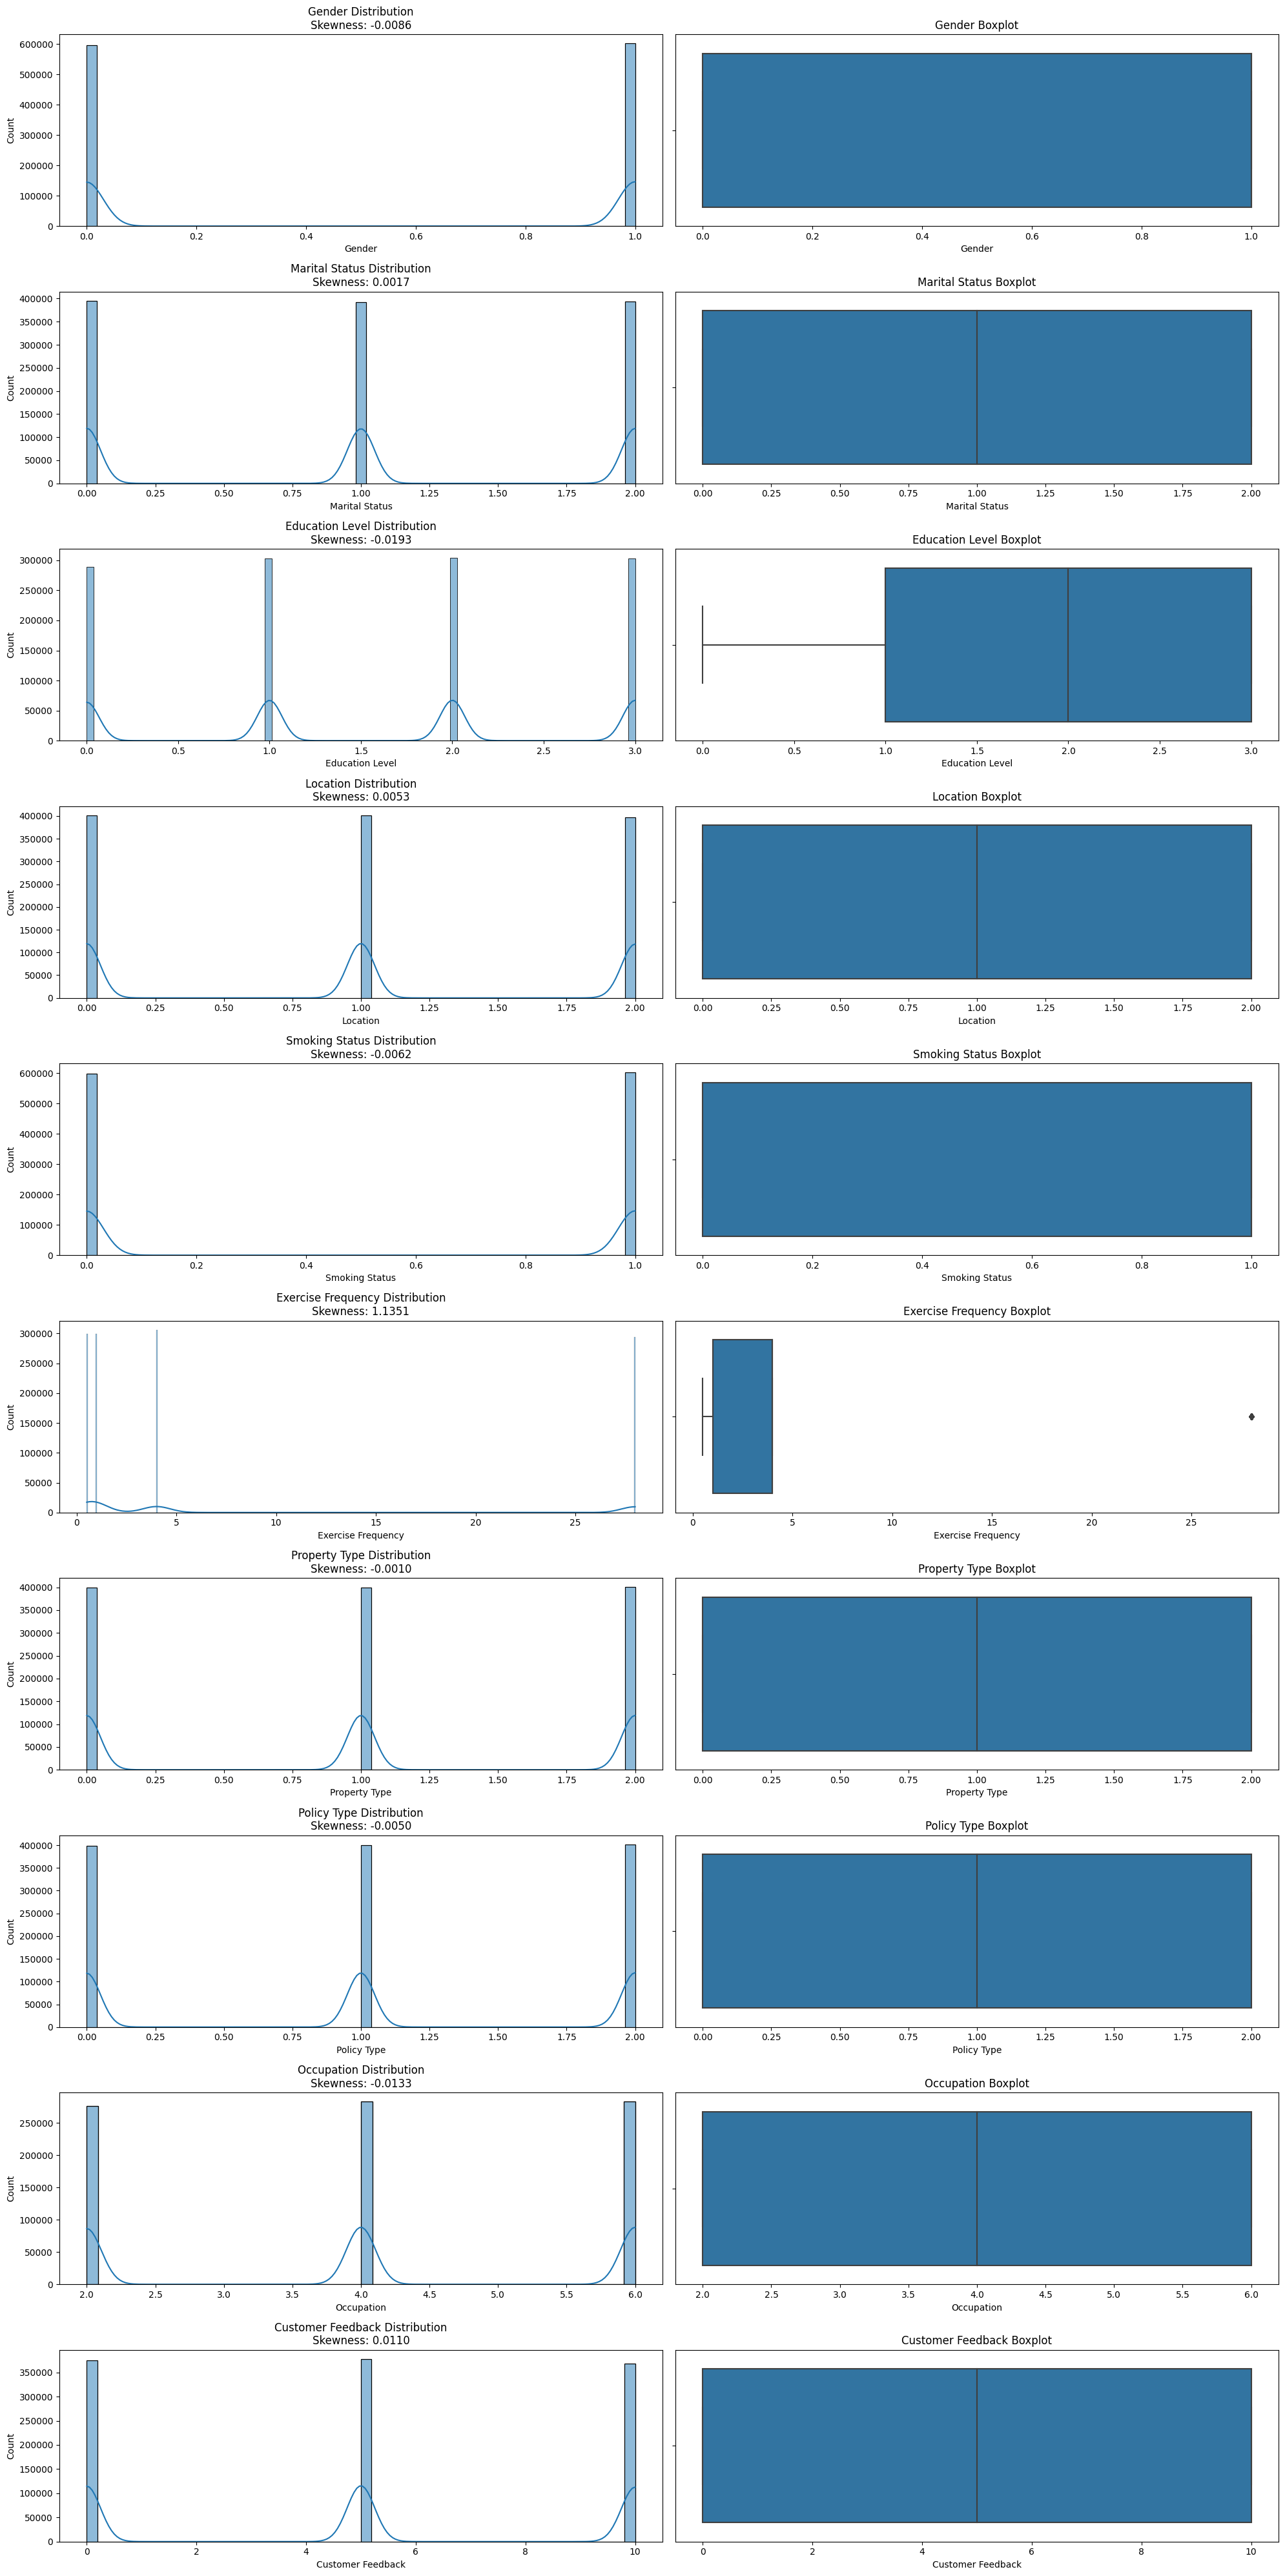


--- Encoded Data Skewness Analysis Report ---

Gender:
Skewness Value: -0.0086
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Marital Status:
Skewness Value: 0.0017
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Education Level:
Skewness Value: -0.0193
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Location:
Skewness Value: 0.0053
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Smoking Status:
Skewness Value: -0.0062
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Exercise Frequency:
Skewness Value: 1.1351

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_skewness(df, features):
    """
    Analyze skewness for specified encoded features
    
    Parameters:
    - df: Input DataFrame
    - features: List of column names to analyze
    
    Returns:
    - Dictionary with skewness details
    """
    # Ensure necessary imports
    import scipy.stats as stats
    
    # Initialize results dictionary
    skewness_results = {}
    
    # Create a figure with appropriate size
    plt.figure(figsize=(20, 4 * len(features)))
    
    for idx, feature in enumerate(features, 1):
        # Skip NaN values
        feature_data = df[feature].dropna()
        
        # Calculate Skewness
        try:
            # Calculate skewness
            skewness = feature_data.skew()
            
            # Shapiro-Wilk test for normality
            _, p_value = stats.shapiro(feature_data)
            
            # Determine Skewness Type
            if abs(skewness) > 1:
                skew_type = "Highly Skewed"
            elif abs(skewness) > 0.5:
                skew_type = "Moderately Skewed"
            else:
                skew_type = "Approximately Symmetric"
            
            # Determine Transformation Recommendation
            if skewness > 1:
                recommended_transform = "Log or Square Root"
            elif skewness < -1:
                recommended_transform = "Exponential"
            else:
                recommended_transform = "No Transform Needed"
            
            # Store Results
            skewness_results[feature] = {
                'skewness_value': skewness,
                'skewness_type': skew_type,
                'shapiro_p_value': p_value,
                'is_normal': p_value > 0.05,
                'recommended_transform': recommended_transform
            }
            
            # Visualization
            plt.subplot(len(features), 2, 2*idx-1)
            sns.histplot(feature_data, kde=True)
            plt.title(f'{feature} Distribution\nSkewness: {skewness:.4f}')
            
            # Box Plot
            plt.subplot(len(features), 2, 2*idx)
            sns.boxplot(x=feature_data)
            plt.title(f'{feature} Boxplot')
        
        except Exception as e:
            print(f"Error processing {feature}: {e}")
            skewness_results[feature] = {
                'skewness_value': None,
                'error': str(e)
            }
    
    plt.tight_layout()
    plt.show()
    
    return skewness_results

def print_skewness_report(skewness_results):
    """
    Print detailed skewness report
    
    Parameters:
    - skewness_results: Dictionary of skewness analysis results
    """
    print("\n--- Encoded Data Skewness Analysis Report ---")
    for feature, details in skewness_results.items():
        print(f"\n{feature}:")
        
        # Handle potential errors
        if 'error' in details:
            print(f"Error in analysis: {details['error']}")
            continue
        
        # Print detailed information
        print(f"Skewness Value: {details['skewness_value']:.4f}")
        print(f"Skewness Type: {details['skewness_type']}")
        print(f"Shapiro-Wilk P-Value: {details.get('shapiro_p_value', 'N/A'):.4f}")
        print(f"Normally Distributed: {details.get('is_normal', 'N/A')}")
        print(f"Recommended Transformation: {details['recommended_transform']}")

def main(df):
    """
    Main function to perform skewness analysis on encoded data
    
    Parameters:
    - df: Input DataFrame (already encoded)
    
    Returns:
    - Skewness analysis results
    """
    # Features to Analyze (use the same list from encoding)
    features = [
        'Gender',
        'Marital Status',
        'Education Level',
        'Location',
        'Smoking Status',
        'Exercise Frequency', 
        'Property Type',
        'Policy Type',
        'Occupation',
        'Customer Feedback'
    ]
    
    # Perform Skewness Analysis
    skewness_results = analyze_skewness(df, features)
    
    # Print Detailed Report
    print_skewness_report(skewness_results)
    
    return skewness_results

# Usage
# Assuming df_encoded is your encoded DataFrame
skewness_results = main(encoded_df)

In [134]:
# Filling missing values in the encoded_df dataset
encoded_df['Credit Score'].fillna(encoded_df['Credit Score'].mean(), inplace=True)
encoded_df['Health Score'].fillna(encoded_df['Health Score'].mean(), inplace=True)
encoded_df['Annual Income'].fillna(encoded_df['Annual Income'].median(), inplace=True)
encoded_df['Number of Dependents'].fillna(encoded_df['Number of Dependents'].mean(), inplace=True)
encoded_df['Age'].fillna(encoded_df['Age'].mean(), inplace=True)
encoded_df['Vehicle Age'].fillna(encoded_df['Age'].mean(),inplace = True)
encoded_df['Insurance Duration'].fillna(encoded_df['Insurance Duration'].mean(),inplace = True)
encoded_df['Previous Claims'].fillna(encoded_df['Previous Claims'].median(), inplace=True)
encoded_df['Marital Status'].fillna(encoded_df['Marital Status'].mode()[0], inplace=True)
encoded_df['Occupation'].fillna(encoded_df['Occupation'].mode()[0], inplace=True)
encoded_df['Customer Feedback'].fillna(encoded_df['Customer Feedback'].mode()[0], inplace=True )


/tmp/ipykernel_24/1359316798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoded_df['Credit Score'].fillna(encoded_df['Credit Score'].mean(), inplace=True)
/tmp/ipykernel_24/1359316798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [135]:
"""
Marital Status, Occupation, Previous Claims, Customer Feedback
Unique values in column 'Occupation': ['Self-Employed' nan 'Employed' 'Unemployed']
Unique values in column 'Marital Status': ['Married' 'Divorced' 'Single' nan]

Unique values in column 'Education Level': ["Bachelor's" "Master's" 'High School' 'PhD']

Unique values in column 'Location': ['Urban' 'Rural' 'Suburban']
Unique values in column 'Policy Type': ['Premium' 'Comprehensive' 'Basic']
Unique values in column 'Customer Feedback': ['Poor' 'Average' 'Good' nan]
Unique values in column 'Smoking Status': ['No' 'Yes']
Unique values in column 'Exercise Frequency': ['Weekly' 'Monthly' 'Daily' 'Rarely']
Unique values in column 'Property Type': ['House' 'Apartment' 'Condo']
"""

'\nMarital Status, Occupation, Previous Claims, Customer Feedback\nUnique values in column \'Occupation\': [\'Self-Employed\' nan \'Employed\' \'Unemployed\']\nUnique values in column \'Marital Status\': [\'Married\' \'Divorced\' \'Single\' nan]\n\nUnique values in column \'Education Level\': ["Bachelor\'s" "Master\'s" \'High School\' \'PhD\']\n\nUnique values in column \'Location\': [\'Urban\' \'Rural\' \'Suburban\']\nUnique values in column \'Policy Type\': [\'Premium\' \'Comprehensive\' \'Basic\']\nUnique values in column \'Customer Feedback\': [\'Poor\' \'Average\' \'Good\' nan]\nUnique values in column \'Smoking Status\': [\'No\' \'Yes\']\nUnique values in column \'Exercise Frequency\': [\'Weekly\' \'Monthly\' \'Daily\' \'Rarely\']\nUnique values in column \'Property Type\': [\'House\' \'Apartment\' \'Condo\']\n'

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1200000.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1200000.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/pyt

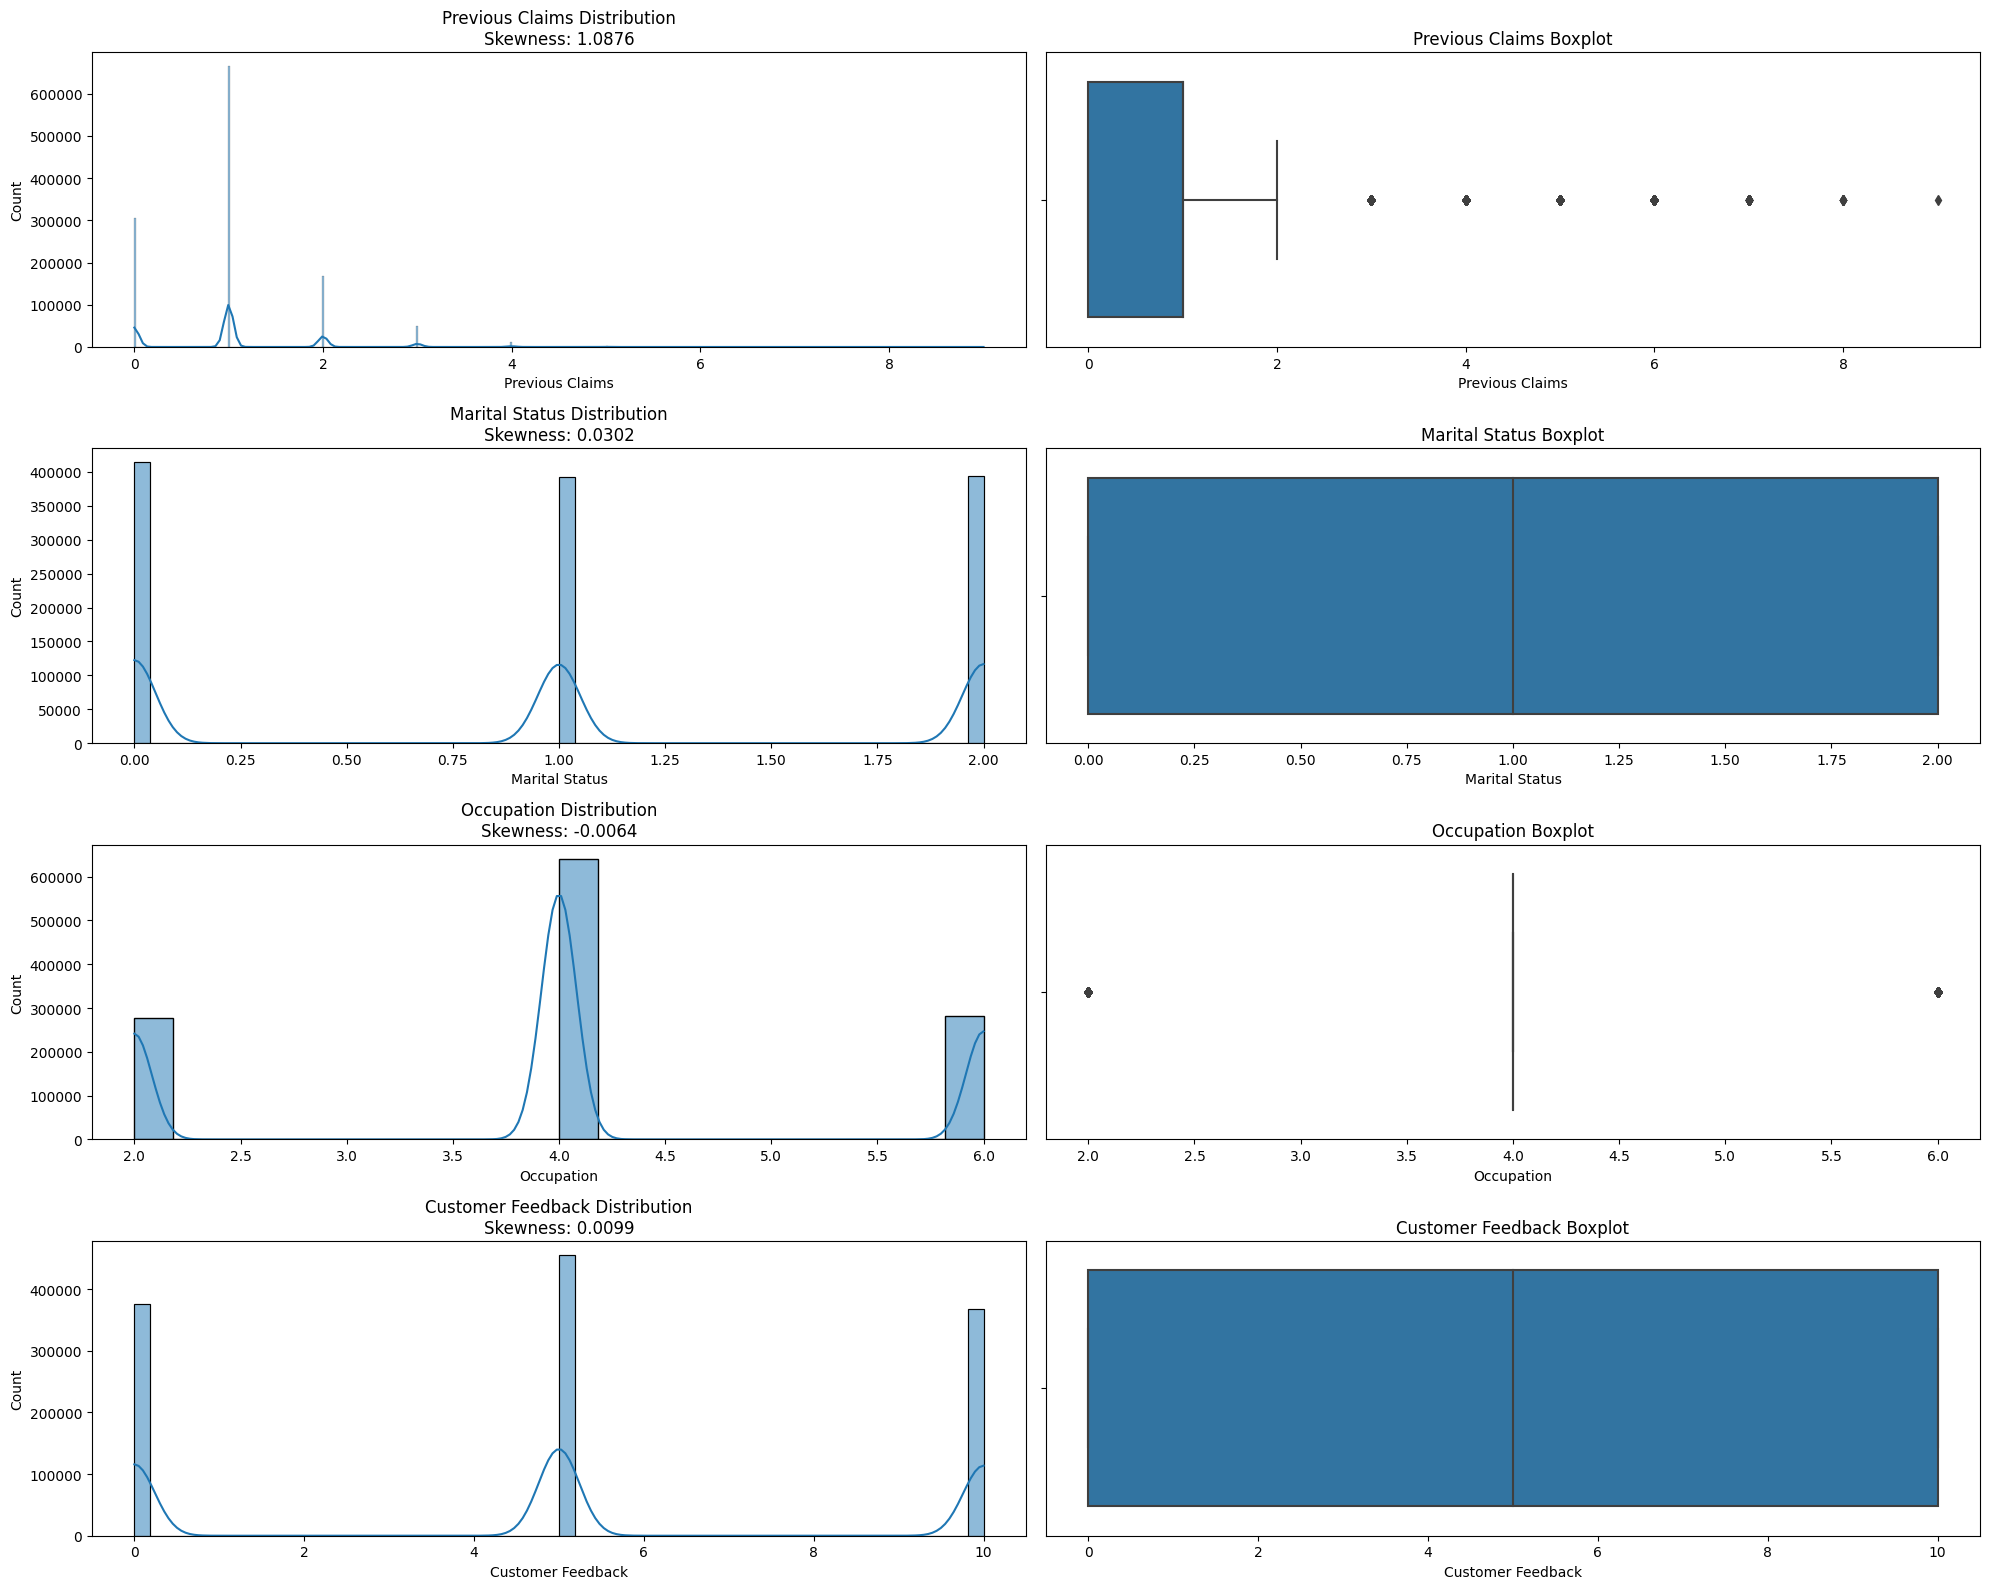


--- Encoded Data Skewness Analysis Report ---

Previous Claims:
Skewness Value: 1.0876
Skewness Type: Highly Skewed
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: Log or Square Root

Marital Status:
Skewness Value: 0.0302
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Occupation:
Skewness Value: -0.0064
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed

Customer Feedback:
Skewness Value: 0.0099
Skewness Type: Approximately Symmetric
Shapiro-Wilk P-Value: 0.0000
Normally Distributed: False
Recommended Transformation: No Transform Needed


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_skewness(df, features):
    """
    Analyze skewness for specified encoded features
    
    Parameters:
    - df: Input DataFrame
    - features: List of column names to analyze
    
    Returns:
    - Dictionary with skewness details
    """
    # Ensure necessary imports
    import scipy.stats as stats
    
    # Initialize results dictionary
    skewness_results = {}
    
    # Create a figure with appropriate size
    plt.figure(figsize=(20, 4 * len(features)))
    
    for idx, feature in enumerate(features, 1):
        # Skip NaN values
        feature_data = df[feature].dropna()
        
        # Calculate Skewness
        try:
            # Calculate skewness
            skewness = feature_data.skew()
            
            # Shapiro-Wilk test for normality
            _, p_value = stats.shapiro(feature_data)
            
            # Determine Skewness Type
            if abs(skewness) > 1:
                skew_type = "Highly Skewed"
            elif abs(skewness) > 0.5:
                skew_type = "Moderately Skewed"
            else:
                skew_type = "Approximately Symmetric"
            
            # Determine Transformation Recommendation
            if skewness > 1:
                recommended_transform = "Log or Square Root"
            elif skewness < -1:
                recommended_transform = "Exponential"
            else:
                recommended_transform = "No Transform Needed"
            
            # Store Results
            skewness_results[feature] = {
                'skewness_value': skewness,
                'skewness_type': skew_type,
                'shapiro_p_value': p_value,
                'is_normal': p_value > 0.05,
                'recommended_transform': recommended_transform
            }
            
            # Visualization
            plt.subplot(len(features), 2, 2*idx-1)
            sns.histplot(feature_data, kde=True)
            plt.title(f'{feature} Distribution\nSkewness: {skewness:.4f}')
            
            # Box Plot
            plt.subplot(len(features), 2, 2*idx)
            sns.boxplot(x=feature_data)
            plt.title(f'{feature} Boxplot')
        
        except Exception as e:
            print(f"Error processing {feature}: {e}")
            skewness_results[feature] = {
                'skewness_value': None,
                'error': str(e)
            }
    
    plt.tight_layout()
    plt.show()
    
    return skewness_results

def print_skewness_report(skewness_results):
    """
    Print detailed skewness report
    
    Parameters:
    - skewness_results: Dictionary of skewness analysis results
    """
    print("\n--- Encoded Data Skewness Analysis Report ---")
    for feature, details in skewness_results.items():
        print(f"\n{feature}:")
        
        # Handle potential errors
        if 'error' in details:
            print(f"Error in analysis: {details['error']}")
            continue
        
        # Print detailed information
        print(f"Skewness Value: {details['skewness_value']:.4f}")
        print(f"Skewness Type: {details['skewness_type']}")
        print(f"Shapiro-Wilk P-Value: {details.get('shapiro_p_value', 'N/A'):.4f}")
        print(f"Normally Distributed: {details.get('is_normal', 'N/A')}")
        print(f"Recommended Transformation: {details['recommended_transform']}")

def main(df):
    """
    Main function to perform skewness analysis on encoded data
    
    Parameters:
    - df: Input DataFrame (already encoded)
    
    Returns:
    - Skewness analysis results
    """
    # Features to Analyze (use the same list from encoding)
    features = ['Previous Claims','Marital Status', 'Occupation','Customer Feedback']
    
    # Perform Skewness Analysis
    skewness_results = analyze_skewness(df, features)
    
    # Print Detailed Report
    print_skewness_report(skewness_results)
    
    return skewness_results

# Usage
# Assuming df_encoded is your encoded DataFrame
skewness_results = main(encoded_df)

In [137]:
encoded_df['Policy Start Date'].head(10)

0    2023-12-23 15:21:39.134960
1    2023-06-12 15:21:39.111551
2    2023-09-30 15:21:39.221386
3    2024-06-12 15:21:39.226954
4    2021-12-01 15:21:39.252145
5    2022-05-20 15:21:39.207847
6    2020-02-21 15:21:39.219432
7    2022-08-08 15:21:39.181605
8    2020-12-14 15:21:39.198406
9    2020-08-02 15:21:39.144722
Name: Policy Start Date, dtype: object


--- Date Column Analysis ---
Column Name: Policy Start Date
Oldest Date: 2019-08-17 15:21:39.080371
Newest Date: 2024-08-15 15:21:39.287115
Total Date Range: 1825 days 00:00:00.206744
Total Unique Dates: 167381

Year Distribution:
Policy Start Date
2022    245671
2021    244918
2020    242087
2023    239067
2024    143968
2019     84289
Name: count, dtype: int64

Month Distribution:
Policy Start Date
5     105176
3     102909
8     101077
4     100906
7     100772
11     99894
10     99408
9      99377
1      98535
6      98500
12     97522
2      95924
Name: count, dtype: int64


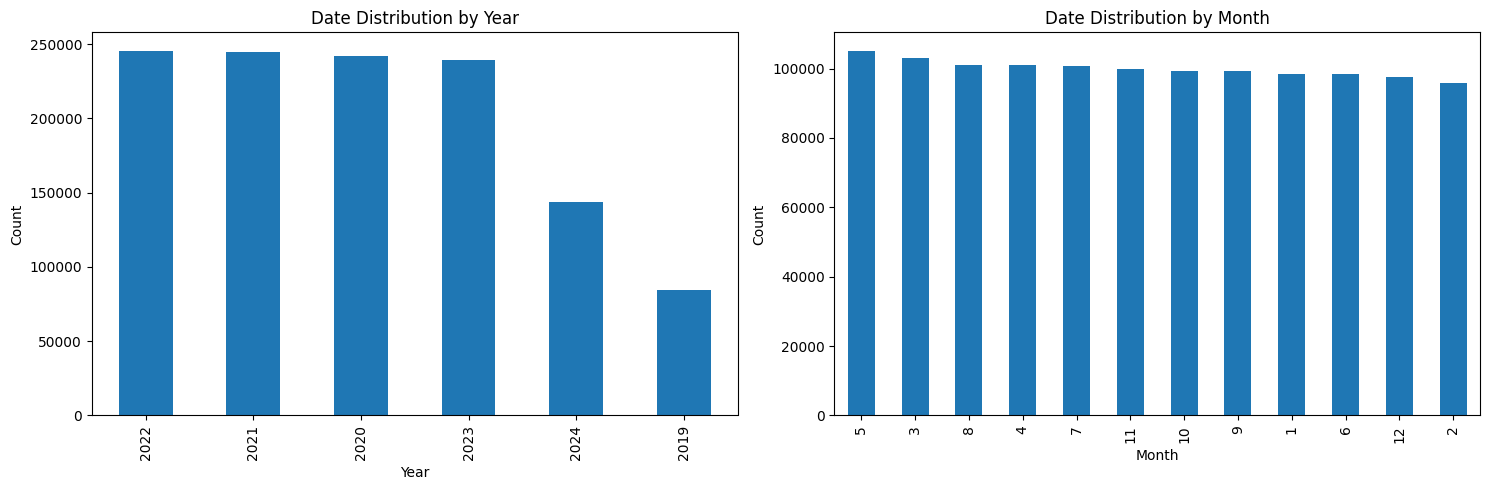


--- Policy Duration Analysis ---
Policy Duration Statistics:
              Years        Months          Days
count  1.200000e+06  1.200000e+06  1.200000e+06
mean   2.308832e+00  5.580091e+00  1.430059e+01
std    1.470736e+00  3.490550e+00  8.717142e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.000000e+00  3.000000e+00  7.000000e+00
50%    2.000000e+00  6.000000e+00  1.400000e+01
75%    4.000000e+00  9.000000e+00  2.200000e+01
max    5.000000e+00  1.200000e+01  2.900000e+01


In [138]:
import pandas as pd
from datetime import datetime

def analyze_date_column(df, column_name):
    """
    Analyze a date column to find oldest, newest, and other key statistics
    
    Parameters:
    - df: DataFrame containing the date column
    - column_name: Name of the date column
    
    Returns:
    - Dictionary with date analysis results
    """
    # Ensure the column is datetime
    df[column_name] = pd.to_datetime(df[column_name])
    
    # Date Analysis
    date_analysis = {
        'oldest_date': df[column_name].min(),
        'newest_date': df[column_name].max(),
        'date_range': df[column_name].max() - df[column_name].min(),
        'total_unique_dates': df[column_name].nunique(),
        'date_distribution': {
            'year_distribution': df[column_name].dt.year.value_counts(),
            'month_distribution': df[column_name].dt.month.value_counts(),
        }
    }
    
    # Detailed Reporting
    print("\n--- Date Column Analysis ---")
    print(f"Column Name: {column_name}")
    print(f"Oldest Date: {date_analysis['oldest_date']}")
    print(f"Newest Date: {date_analysis['newest_date']}")
    print(f"Total Date Range: {date_analysis['date_range']}")
    print(f"Total Unique Dates: {date_analysis['total_unique_dates']}")
    
    # Year Distribution
    print("\nYear Distribution:")
    print(date_analysis['date_distribution']['year_distribution'])
    
    # Month Distribution
    print("\nMonth Distribution:")
    print(date_analysis['date_distribution']['month_distribution'])
    
    # Additional Visualizations
    plt.figure(figsize=(15, 5))
    
    # Year Distribution Plot
    plt.subplot(1, 2, 1)
    date_analysis['date_distribution']['year_distribution'].plot(kind='bar')
    plt.title('Date Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    # Month Distribution Plot
    plt.subplot(1, 2, 2)
    date_analysis['date_distribution']['month_distribution'].plot(kind='bar')
    plt.title('Date Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    return date_analysis

# Additional helper functions
def calculate_policy_duration(df, start_date_column):
    """
    Calculate policy duration from start date to current date
    
    Parameters:
    - df: DataFrame
    - start_date_column: Name of the start date column
    
    Returns:
    - Series of policy durations
    """
    current_date = pd.Timestamp.now()
    df[start_date_column] = pd.to_datetime(df[start_date_column])
    
    # Calculate duration
    policy_duration = current_date - df[start_date_column]
    
    # Convert to years, months, days
    years = policy_duration.dt.days // 365
    months = (policy_duration.dt.days % 365) // 30
    days = (policy_duration.dt.days % 365) % 30
    
    # Create summary
    duration_summary = pd.DataFrame({
        'Years': years,
        'Months': months,
        'Days': days
    })
    
    print("\n--- Policy Duration Analysis ---")
    print("Policy Duration Statistics:")
    print(duration_summary.describe())
    
    return duration_summary

# Main execution function
def main(df, column_name):
    """
    Main function to perform date column analysis
    
    Parameters:
    - df: DataFrame
    - column_name: Name of the date column
    
    Returns:
    - Date analysis results
    """
    # Analyze Date Column
    date_analysis = analyze_date_column(df, column_name)
    
    # Calculate Policy Duration
    policy_duration = calculate_policy_duration(df, column_name)
    
    return {
        'date_analysis': date_analysis,
        'policy_duration': policy_duration
    }

# Usage
results = main(encoded_df, 'Policy Start Date')


--- Comprehensive Date Feature Analysis ---

Date Range:
Earliest Date: 2019-08-17 15:21:39.080371
Latest Date: 2024-08-15 15:21:39.287115

Feature Distribution:

Policy_Start_Year Distribution:
Policy_Start_Year
2022    245671
2021    244918
2020    242087
2023    239067
2024    143968
2019     84289
Name: count, dtype: int64

Policy_Start_Month Distribution:
Policy_Start_Month
5     105176
3     102909
8     101077
4     100906
7     100772
11     99894
10     99408
9      99377
1      98535
6      98500
12     97522
2      95924
Name: count, dtype: int64

Policy_Start_Quarter Distribution:
Policy_Start_Quarter
2    304582
3    301226
1    297368
4    296824
Name: count, dtype: int64

Policy_Start_Season Distribution:
Policy_Start_Season
Spring    308991
Summer    300349
Autumn    298679
Winter    291981
Name: count, dtype: int64


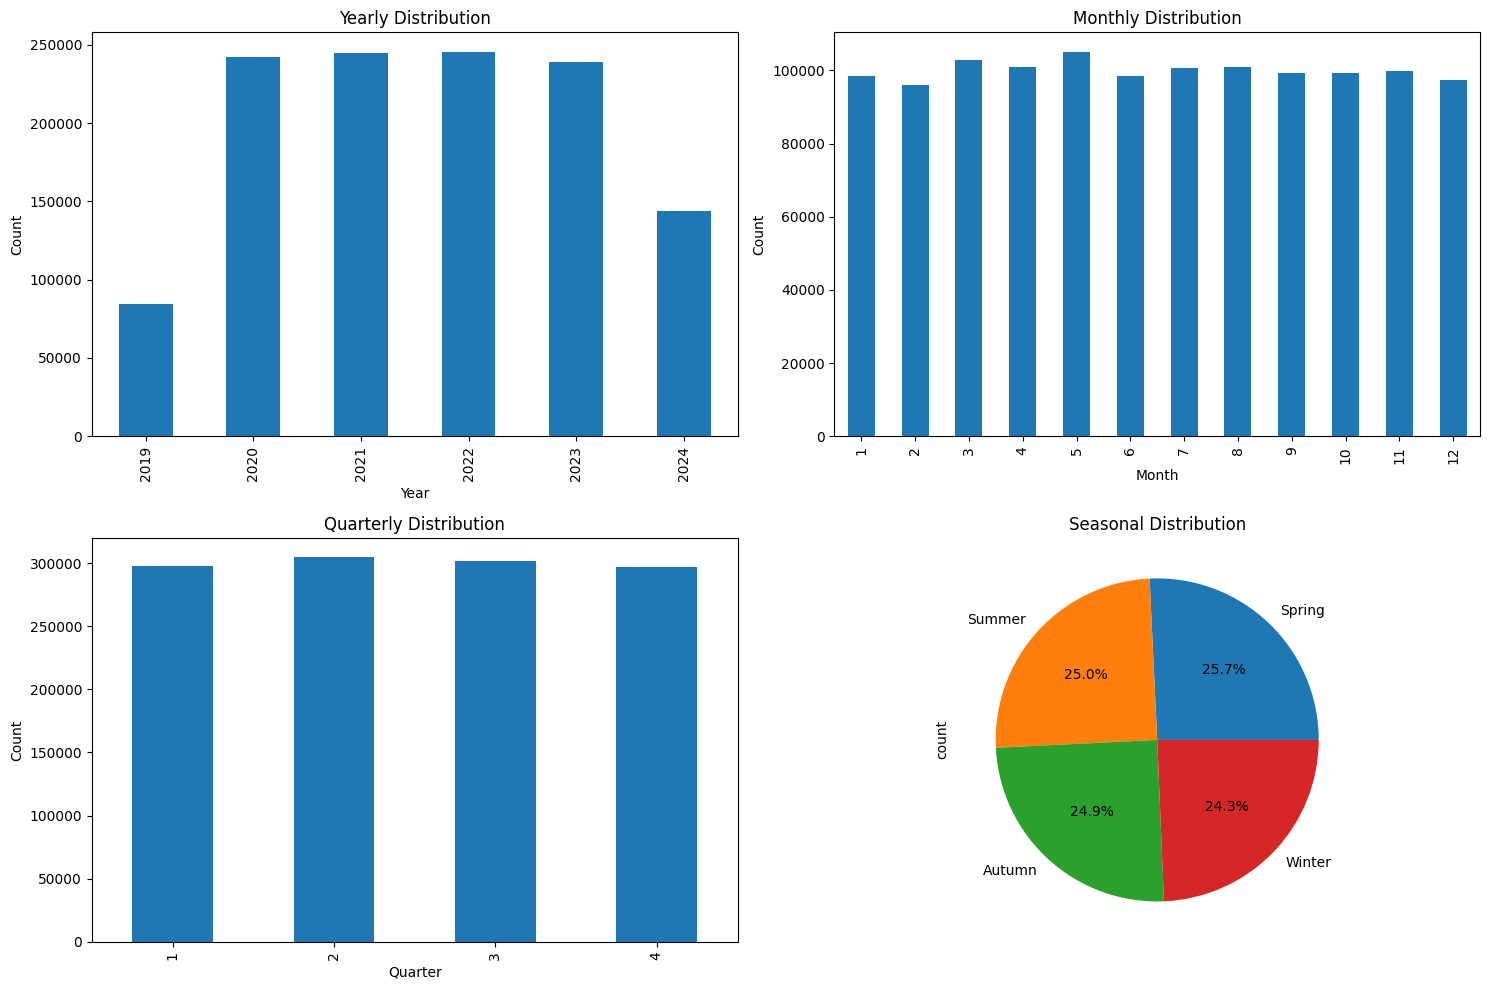

In [139]:
import pandas as pd
import numpy as np

def create_date_features(df_date_data):
    """
    Comprehensive date feature extraction with robust handling
    
    Parameters:
    - df_date_data: DataFrame or Series with date information
    
    Returns:
    - DataFrame with extracted date features
    """
    # Ensure we're working with a DataFrame or Series
    if not isinstance(df_date_data, (pd.DataFrame, pd.Series)):
        raise ValueError("Input must be a pandas DataFrame or Series")
    
    # Convert to DataFrame if it's a Series
    if isinstance(df_date_data, pd.Series):
        df_date_data = df_date_data.to_frame(name='Policy_Start_Date')
    
    # Ensure date column exists
    if 'Policy_Start_Date' not in df_date_data.columns:
        df_date_data = df_date_data.rename(columns={df_date_data.columns[0]: 'Policy_Start_Date'})
    
    # Convert to datetime with error handling
    try:
        df_date_data['Policy_Start_Date'] = pd.to_datetime(
            df_date_data['Policy_Start_Date'], 
            errors='coerce'  # Convert invalid dates to NaT
        )
    except Exception as e:
        print(f"Error converting to datetime: {e}")
        return df_date_data
    
    # Remove rows with invalid dates if needed
    df_date_data = df_date_data.dropna(subset=['Policy_Start_Date'])
    
    # Date Extraction Features
    date_features = {
        'Policy_Start_Year': df_date_data['Policy_Start_Date'].dt.year,
        'Policy_Start_Month': df_date_data['Policy_Start_Date'].dt.month,
        'Policy_Start_Day': df_date_data['Policy_Start_Date'].dt.day,
        'Policy_Start_Quarter': df_date_data['Policy_Start_Date'].dt.quarter,
        'Policy_Start_Day_of_Week': df_date_data['Policy_Start_Date'].dt.dayofweek,
        'Policy_Start_Is_Weekend': df_date_data['Policy_Start_Date'].dt.dayofweek.isin([5,6]).astype(int)
    }
    
    # Add extracted features to DataFrame
    for feature_name, feature_data in date_features.items():
        df_date_data[feature_name] = feature_data
    
    # Policy Age Calculation
    reference_date = pd.Timestamp.now()
    df_date_data['Policy_Age_Days'] = (reference_date - df_date_data['Policy_Start_Date']).dt.days
    df_date_data['Policy_Age_Years'] = df_date_data['Policy_Age_Days'] / 365.25
    
    # Seasonality Features
    season_map = {
        1: 'Winter', 2: 'Winter', 3: 'Spring', 
        4: 'Spring', 5: 'Spring', 6: 'Summer', 
        7: 'Summer', 8: 'Summer', 9: 'Autumn', 
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    }
    df_date_data['Policy_Start_Season'] = df_date_data['Policy_Start_Month'].map(season_map)
    
    # Advanced Date Features
    df_date_data['Is_Leap_Year'] = df_date_data['Policy_Start_Date'].dt.is_leap_year
    df_date_data['Days_In_Month'] = df_date_data['Policy_Start_Date'].dt.days_in_month
    
    # Date Range Percentile
    df_date_data['Date_Range_Percentile'] = (
        (df_date_data['Policy_Start_Date'] - df_date_data['Policy_Start_Date'].min()) / 
        (df_date_data['Policy_Start_Date'].max() - df_date_data['Policy_Start_Date'].min())
    ) * 100
    
    # Comprehensive Date Analysis
    print("\n--- Comprehensive Date Feature Analysis ---")
    print("\nDate Range:")
    print(f"Earliest Date: {df_date_data['Policy_Start_Date'].min()}")
    print(f"Latest Date: {df_date_data['Policy_Start_Date'].max()}")
    
    print("\nFeature Distribution:")
    for feature in ['Policy_Start_Year', 'Policy_Start_Month', 'Policy_Start_Quarter', 'Policy_Start_Season']:
        print(f"\n{feature} Distribution:")
        print(df_date_data[feature].value_counts())
    
    # Optional Visualization
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(15, 10))
        
        # Yearly Distribution
        plt.subplot(2, 2, 1)
        df_date_data['Policy_Start_Year'].value_counts().sort_index().plot(kind='bar')
        plt.title('Yearly Distribution')
        plt.xlabel('Year')
        plt.ylabel('Count')
        
        # Monthly Distribution
        plt.subplot(2, 2, 2)
        df_date_data['Policy_Start_Month'].value_counts().sort_index().plot(kind='bar')
        plt.title('Monthly Distribution')
        plt.xlabel('Month')
        plt.ylabel('Count')
        
        # Quarter Distribution
        plt.subplot(2, 2, 3)
        df_date_data['Policy_Start_Quarter'].value_counts().sort_index().plot(kind='bar')
        plt.title('Quarterly Distribution')
        plt.xlabel('Quarter')
        plt.ylabel('Count')
        
        # Season Distribution
        plt.subplot(2, 2, 4)
        df_date_data['Policy_Start_Season'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Seasonal Distribution')
        
        plt.tight_layout()
        plt.show()
    except Exception as viz_error:
        print(f"Visualization error: {viz_error}")
    
    return df_date_data

# Usage Examples
# Method 1: With DataFrame
# df_with_date_features = create_date_features(df)

# Method 2: With Series
df_with_date_features = create_date_features(df['Policy Start Date'])


In [140]:
df_with_date_features.sample(20)

# drop these column Policy_Start_date, Policy_Start_Quarter, Policy_Start_Day_of_Week, Policy_Start_Is_Weekend, Policy_Start_Season, Is_Leap_Year, Days_In_Month	Date_Range_Percentile from df_wtih_date_features

,Policy_Start_Date,Policy_Start_Year,Policy_Start_Month,Policy_Start_Day,Policy_Start_Quarter,Policy_Start_Day_of_Week,Policy_Start_Is_Weekend,Policy_Age_Days,Policy_Age_Years,Policy_Start_Season,Is_Leap_Year,Days_In_Month,Date_Range_Percentile
584719,2024-07-06 15:21:39.098696,2024,7,6,3,5,1,150,0.410678,Summer,True,31,97.808219
711114,2020-08-19 15:21:39.225916,2020,8,19,3,2,0,1567,4.290212,Summer,True,31,20.164384
980838,2019-12-10 15:21:39.094752,2019,12,10,4,1,0,1820,4.982888,Winter,False,31,6.301370
84828,2020-04-11 15:21:39.190215,2020,4,11,2,5,1,1697,4.646133,Spring,True,30,13.041096
542293,2022-08-10 15:21:39.285112,2022,8,10,3,2,0,846,2.316222,Summer,False,31,59.671233
361600,2024-07-05 15:21:39.134960,2024,7,5,3,4,0,151,0.413415,Summer,True,31,97.753425
410006,2024-06-22 15:21:39.081504,2024,6,22,2,5,1,164,0.449008,Summer,True,30,97.041096
81727,2023-10-21 15:21:39.224915,2023,10,21,4,5,1,409,1.119781,Autumn,False,31,83.616438
765715,2021-03-24 15:21:39.134960,2021,3,24,1,2,0,1350,3.696099,Spring,False,31,32.054795
495273,2022-10-13 15:21:39.146733,2022,10,13,4,3,0,782,2.140999,Autumn,False,31,63.178082


In [141]:
# Sample 20 rows
sampled_df = df_with_date_features.sample(20)

# Drop specified columns
columns_to_drop = [
    'Policy_Start_Date', 
    'Policy_Start_Quarter', 
    'Policy_Start_Day_of_Week', 
    'Policy_Start_Is_Weekend', 
    'Policy_Start_Season', 
    'Is_Leap_Year', 
    'Days_In_Month', 
    'Date_Range_Percentile',
    'Policy_Start_Year'
]

df_cleaned = df_with_date_features.drop(columns=columns_to_drop)


df_cleaned.sample(20)

,Policy_Start_Month,Policy_Start_Day,Policy_Age_Days,Policy_Age_Years
389255,1,24,314,0.859685
812006,4,24,223,0.610541
1103891,12,23,711,1.946612
721220,6,17,1265,3.463381
824774,5,9,208,0.569473
660902,8,9,847,2.318960
332653,3,4,640,1.752225
174648,5,10,207,0.566735
90633,11,13,751,2.056126
1068106,11,4,760,2.080767


In [164]:
# Simple Concatenation
final_dataframe = pd.concat([encoded_df, df_cleaned], axis=1)

# Remove duplicate columns
final_dataframe = final_dataframe.loc[:, ~final_dataframe.columns.duplicated()]
final_dataframe.drop('Policy Start Date', axis=1, inplace=True)


# Quick verification
print(final_dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  int64  
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  float64
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  int64  
 7   Occupation            1200000 non-null  float64
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  int64  
 10  Policy Type           1200000 non-null  int64  
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [165]:
final_dataframe.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Month,Policy_Start_Day,Policy_Age_Days,Policy_Age_Years
0,0,19.0,0,10049.0,2.0,1.0,1,6.0,22.598761,2,...,5.0,0.0,0,4.0,2,2869.0,12,23,346,0.947296
1,1,39.0,0,31678.0,1.0,3.0,2,4.0,15.569731,0,...,2.0,5.0,1,1.0,2,1483.0,6,12,540,1.478439
2,2,23.0,1,25602.0,1.0,3.0,0,6.0,47.177549,1,...,3.0,10.0,1,4.0,2,567.0,9,30,430,1.177276
3,3,21.0,1,141855.0,2.0,2.0,1,4.0,10.938144,0,...,1.0,0.0,1,28.0,1,765.0,6,12,174,0.476386
4,4,21.0,1,39651.0,0.0,1.0,1,6.0,20.376094,0,...,4.0,0.0,1,4.0,2,2022.0,12,1,1098,3.006160


In [166]:
final_dataframe.to_csv("final_dataframe.csv")

In [167]:
print("NUll values in the df:"), print(final_dataframe.isnull().sum()),print()
print(final_dataframe.dtypes.value_counts())

NUll values in the df:
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Policy_Start_Month      0
Policy_Start_Day        0
Policy_Age_Days         0
Policy_Age_Years        0
dtype: int64

float64    14
int64       8
int32       2
Name: count, dtype: int64


In [147]:
# c = final_dataframe.columns
# for i in c:
#     if final_dataframe[i].dtypes == 'object':
#         print(i)
# # output = Customer feedback
# # final_dataframe['Customer Feedback'].head(20)

In [148]:
# # Detailed Type Investigation
# print(final_dataframe['Customer Feedback'].dtype)
# print(final_dataframe['Customer Feedback'].unique())

# # Explicit Type Conversion
# final_dataframe['Customer Feedback'] = pd.to_numeric(final_dataframe['Customer Feedback'], errors='coerce')

# # Verify Type
# print(final_dataframe['Customer Feedback'].dtype)

# # Alternative Approach
# def convert_to_numeric(series):
#     try:
#         return pd.to_numeric(series)
#     except:
#         return series

# # Apply to entire dataframe
# final_dataframe = final_dataframe.apply(convert_to_numeric)

# # Categorical Column Detection
# categorical_cols = final_dataframe.select_dtypes(include=['object']).columns
# print("Categorical Columns:", list(categorical_cols))

In [149]:
final_dataframe['Customer Feedback'].nunique()

3

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from scipy.stats import uniform, randint

# Prepare data
X = final_dataframe.drop('Premium Amount', axis=1)
y = final_dataframe['Premium Amount']

# Identify categorical columns
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Regressor
model = CatBoostRegressor(loss_function='RMSE', verbose=0)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'iterations': randint(100, 2000),  # Random integer between 100 and 2000
    'learning_rate': uniform(0.01, 0.2),  # Random float between 0.01 and 0.21
    'depth': randint(4, 10),  # Random integer between 4 and 10
    'l2_leaf_reg': uniform(1, 10),  # Random float between 1 and 10
    'bagging_temperature': uniform(0, 1)  # Random float between 0 and 1
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Feature importance
feature_importance = best_model.get_feature_importance()
feature_names = X.columns
for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance}")

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Direct preprocessing
X = final_dataframe.drop('Premium Amount', axis=1)
y = final_dataframe['Premium Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = lgb.LGBMRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'num_leaves': randint(20, 150),  # Random integer between 20 and 150
    'learning_rate': uniform(0.01, 0.1),  # Random float between 0.01 and 0.1
    'n_estimators': randint(100, 2000),  # Random integer between 100 and 2000
    'bagging_fraction': uniform(0.6, 0.4),  # Random float between 0.6 and 1.0
    'feature_fraction': uniform(0.6, 0.4),  # Random float between 0.6 and 1.0
    'bagging_freq': randint(1, 10)  # Random integer between 1 and 10
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Feature Importance
import pandas as pd

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importance()
}).sort_values('importance', ascending=False)

print("\nTop Features:")
print(importance_df.head(10))

# Additional Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"\nMean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape:.2%}")

# Scatter plot of predicted vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Actual vs Predicted Premium Amount')
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] feature_fraction is set=0.8394633936788146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8394633936788146
[LightGBM] [Warning] bagging_fraction is set=0.749816047538945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.749816047538945
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8394633936788146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8394633936788146
[LightGBM] [Warning] bagging_fraction is set=0.749816047538945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.749816047538945
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041486 seconds.
You can set `force_

# DF test


In [152]:
import pandas as pd
import numpy as np

# Define encoding mappings globally
ENCODING_MAPPINGS = {
    'Gender': {
        'Female': 0, 
        'Male': 1
    },
    'Marital Status': {
        'Married': 2, 
        'Divorced': 1, 
        'Single': 0,
        np.nan: np.nan
    },
    'Education Level': {
        'High School': 0, 
        "Bachelor's": 1, 
        "Master's": 2, 
        'PhD': 3
    },
    'Location': {
        'Rural': 0, 
        'Suburban': 1, 
        'Urban': 2
    },
    'Smoking Status': {
        'No': 0, 
        'Yes': 1
    },
    'Exercise Frequency': {
        'Rarely': 0.5, 
        'Monthly': 1, 
        'Weekly': 4, 
        'Daily': 28
    },
    'Property Type': {
        'Condo': 0, 
        'Apartment': 1, 
        'House': 2
    },
    'Policy Type': {
        'Basic': 0, 
        'Comprehensive': 1, 
        'Premium': 2
    },
    'Occupation': {
        np.nan: np.nan,
        'Unemployed': 2, 
        'Employed': 4, 
        'Self-Employed': 6
    },
    'Customer Feedback': {
        'Poor': 0, 
        'Average': 5, 
        'Good': 10,
        'No Feedback': np.nan,
        np.nan: np.nan
    }
}

def ordinal_encoding(df):
    # Deep copy to avoid modifying original DataFrame
    encoded_df = df.copy()
    
    # Apply Ordinal Encoding
    for column, mapping in ENCODING_MAPPINGS.items():
        if column in df.columns:
            encoded_df[column] = df[column].map(mapping)
    
    return encoded_df

def validate_encoding(df, encoded_df):
    """
    Validate the encoding process
    
    Parameters:
    - df: Original DataFrame
    - encoded_df: Encoded DataFrame
    
    Returns:
    - Detailed encoding validation report
    """
    print("\n--- Encoding Validation Report ---")
    
    for column in encoded_df.columns:
        if column in ENCODING_MAPPINGS:
            print(f"\n{column} Encoding:")
            
            # Original Unique Values
            print("Original Unique Values:")
            print(df[column].unique())
            
            # Encoded Unique Values
            print("\nEncoded Unique Values:")
            print(encoded_df[column].unique())
            
            # Mapping Verification
            mapping_verification = df[column].value_counts().to_frame()
            mapping_verification['Encoded Value'] = mapping_verification.index.map(
                ENCODING_MAPPINGS.get(column, {})
            )
            
            print("\nMapping Verification:")
            print(mapping_verification)
            print("-" * 50)
    
    return encoded_df

def main(df):
    """
    Main function to perform ordinal encoding
    
    Parameters:
    - df: Input DataFrame
    
    Returns:
    - Encoded DataFrame with validation report
    """
    # Perform Ordinal Encoding
    encoded_df = ordinal_encoding(df)
    
    # Validate Encoding
    validated_df = validate_encoding(df, encoded_df)
    
    return validated_df

# Usage
encoded_df_test = main(df_test)


--- Encoding Validation Report ---

Gender Encoding:
Original Unique Values:
['Female' 'Male']

Encoded Unique Values:
[0 1]

Mapping Verification:
         count  Encoded Value
Gender                       
Male    401089              1
Female  398911              0
--------------------------------------------------

Marital Status Encoding:
Original Unique Values:
[nan 'Married' 'Divorced' 'Single']

Encoded Unique Values:
[nan  2.  1.  0.]

Mapping Verification:
                 count  Encoded Value
Marital Status                       
Single          263705            0.0
Married         262172            2.0
Divorced        261787            1.0
--------------------------------------------------

Education Level Encoding:
Original Unique Values:
["Bachelor's" "Master's" 'PhD' 'High School']

Encoded Unique Values:
[1 2 3 0]

Mapping Verification:
                  count  Encoded Value
Education Level                       
Master's         202552              2
PhD              

In [153]:
# Filling missing values in the encoded_df_test dataset
encoded_df_test['Credit Score'].fillna(encoded_df_test['Credit Score'].mean(), inplace=True)
encoded_df_test['Health Score'].fillna(encoded_df_test['Health Score'].mean(), inplace=True)
encoded_df_test['Annual Income'].fillna(encoded_df_test['Annual Income'].median(), inplace=True)
encoded_df_test['Number of Dependents'].fillna(encoded_df_test['Number of Dependents'].mean(), inplace=True)
encoded_df_test['Age'].fillna(encoded_df_test['Age'].mean(), inplace=True)
encoded_df_test['Vehicle Age'].fillna(encoded_df_test['Age'].mean(), inplace=True)
encoded_df_test['Insurance Duration'].fillna(encoded_df_test['Insurance Duration'].mean(), inplace=True)
encoded_df_test['Previous Claims'].fillna(encoded_df_test['Previous Claims'].median(), inplace=True)
encoded_df_test['Marital Status'].fillna(encoded_df_test['Marital Status'].mode()[0], inplace=True)
encoded_df_test['Occupation'].fillna(encoded_df_test['Occupation'].mode()[0], inplace=True)
encoded_df_test['Customer Feedback'].fillna(encoded_df_test['Customer Feedback'].mode()[0], inplace=True)

/tmp/ipykernel_24/4123749748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoded_df_test['Credit Score'].fillna(encoded_df_test['Credit Score'].mean(), inplace=True)
/tmp/ipykernel_24/4123749748.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df


--- Comprehensive Date Feature Analysis ---

Date Range:
Earliest Date: 2019-08-17 15:21:39.080440
Latest Date: 2024-08-15 15:21:39.287115

Feature Distribution:

Policy_Start_Year Distribution:
Policy_Start_Year
2021    163731
2022    163456
2020    160783
2023    159426
2024     96119
2019     56485
Name: count, dtype: int64

Policy_Start_Month Distribution:
Policy_Start_Month
5     69815
3     68719
8     67662
4     67546
7     67111
11    66656
9     66179
10    66118
6     65942
1     65876
12    64785
2     63591
Name: count, dtype: int64

Policy_Start_Quarter Distribution:
Policy_Start_Quarter
2    203303
3    200952
1    198186
4    197559
Name: count, dtype: int64

Policy_Start_Season Distribution:
Policy_Start_Season
Spring    206080
Summer    200715
Autumn    198953
Winter    194252
Name: count, dtype: int64


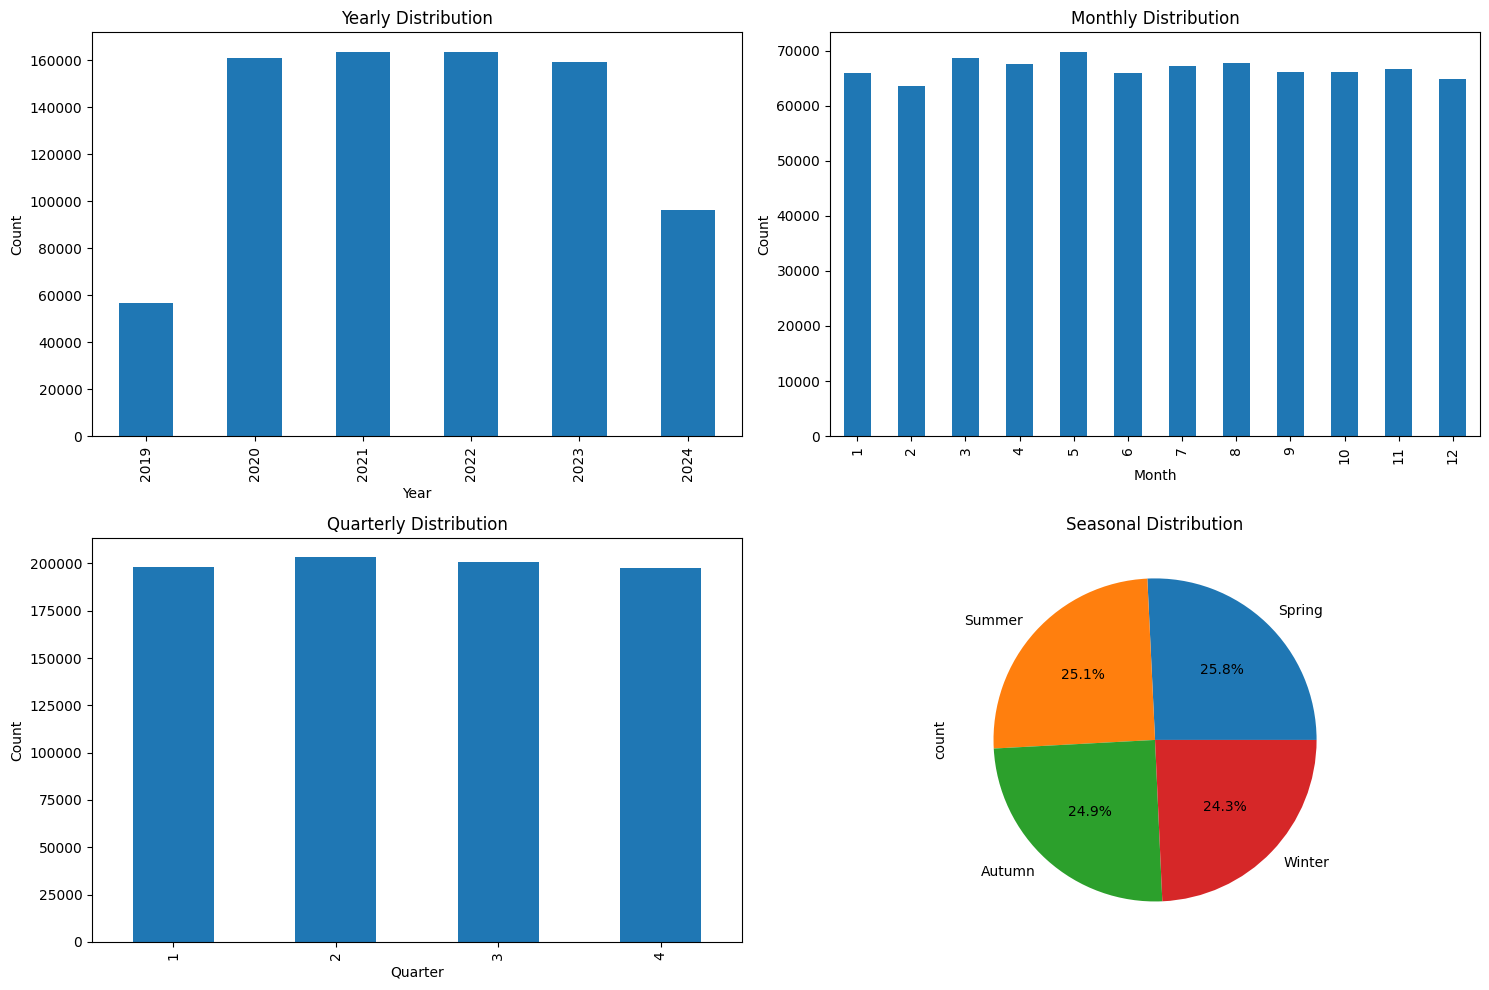

In [154]:
import pandas as pd
import numpy as np

def create_date_features(df_date_data):
    """
    Comprehensive date feature extraction with robust handling
    
    Parameters:
    - df_date_data: DataFrame or Series with date information
    
    Returns:
    - DataFrame with extracted date features
    """
    # Ensure we're working with a DataFrame or Series
    if not isinstance(df_date_data, (pd.DataFrame, pd.Series)):
        raise ValueError("Input must be a pandas DataFrame or Series")
    
    # Convert to DataFrame if it's a Series
    if isinstance(df_date_data, pd.Series):
        df_date_data = df_date_data.to_frame(name='Policy_Start_Date')
    
    # Ensure date column exists
    if 'Policy_Start_Date' not in df_date_data.columns:
        df_date_data = df_date_data.rename(columns={df_date_data.columns[0]: 'Policy_Start_Date'})
    
    # Convert to datetime with error handling
    try:
        df_date_data['Policy_Start_Date'] = pd.to_datetime(
            df_date_data['Policy_Start_Date'], 
            errors='coerce'  # Convert invalid dates to NaT
        )
    except Exception as e:
        print(f"Error converting to datetime: {e}")
        return df_date_data
    
    # Remove rows with invalid dates if needed
    df_date_data = df_date_data.dropna(subset=['Policy_Start_Date'])
    
    # Date Extraction Features
    date_features = {
        'Policy_Start_Year': df_date_data['Policy_Start_Date'].dt.year,
        'Policy_Start_Month': df_date_data['Policy_Start_Date'].dt.month,
        'Policy_Start_Day': df_date_data['Policy_Start_Date'].dt.day,
        'Policy_Start_Quarter': df_date_data['Policy_Start_Date'].dt.quarter,
        'Policy_Start_Day_of_Week': df_date_data['Policy_Start_Date'].dt.dayofweek,
        'Policy_Start_Is_Weekend': df_date_data['Policy_Start_Date'].dt.dayofweek.isin([5,6]).astype(int)
    }
    
    # Add extracted features to DataFrame
    for feature_name, feature_data in date_features.items():
        df_date_data[feature_name] = feature_data
    
    # Policy Age Calculation
    reference_date = pd.Timestamp.now()
    df_date_data['Policy_Age_Days'] = (reference_date - df_date_data['Policy_Start_Date']).dt.days
    df_date_data['Policy_Age_Years'] = df_date_data['Policy_Age_Days'] / 365.25
    
    # Seasonality Features
    season_map = {
        1: 'Winter', 2: 'Winter', 3: 'Spring', 
        4: 'Spring', 5: 'Spring', 6: 'Summer', 
        7: 'Summer', 8: 'Summer', 9: 'Autumn', 
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    }
    df_date_data['Policy_Start_Season'] = df_date_data['Policy_Start_Month'].map(season_map)
    
    # Advanced Date Features
    df_date_data['Is_Leap_Year'] = df_date_data['Policy_Start_Date'].dt.is_leap_year
    df_date_data['Days_In_Month'] = df_date_data['Policy_Start_Date'].dt.days_in_month
    
    # Date Range Percentile
    df_date_data['Date_Range_Percentile'] = (
        (df_date_data['Policy_Start_Date'] - df_date_data['Policy_Start_Date'].min()) / 
        (df_date_data['Policy_Start_Date'].max() - df_date_data['Policy_Start_Date'].min())
    ) * 100
    
    # Comprehensive Date Analysis
    print("\n--- Comprehensive Date Feature Analysis ---")
    print("\nDate Range:")
    print(f"Earliest Date: {df_date_data['Policy_Start_Date'].min()}")
    print(f"Latest Date: {df_date_data['Policy_Start_Date'].max()}")
    
    print("\nFeature Distribution:")
    for feature in ['Policy_Start_Year', 'Policy_Start_Month', 'Policy_Start_Quarter', 'Policy_Start_Season']:
        print(f"\n{feature} Distribution:")
        print(df_date_data[feature].value_counts())
    
    # Optional Visualization
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(15, 10))
        
        # Yearly Distribution
        plt.subplot(2, 2, 1)
        df_date_data['Policy_Start_Year'].value_counts().sort_index().plot(kind='bar')
        plt.title('Yearly Distribution')
        plt.xlabel('Year')
        plt.ylabel('Count')
        
        # Monthly Distribution
        plt.subplot(2, 2, 2)
        df_date_data['Policy_Start_Month'].value_counts().sort_index().plot(kind='bar')
        plt.title('Monthly Distribution')
        plt.xlabel('Month')
        plt.ylabel('Count')
        
        # Quarter Distribution
        plt.subplot(2, 2, 3)
        df_date_data['Policy_Start_Quarter'].value_counts().sort_index().plot(kind='bar')
        plt.title('Quarterly Distribution')
        plt.xlabel('Quarter')
        plt.ylabel('Count')
        
        # Season Distribution
        plt.subplot(2, 2, 4)
        df_date_data['Policy_Start_Season'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Seasonal Distribution')
        
        plt.tight_layout()
        plt.show()
    except Exception as viz_error:
        print(f"Visualization error: {viz_error}")
    
    return df_date_data

# Usage Examples
# Method 1: With DataFrame
# df_with_date_features = create_date_features(df)

# Method 2: With Series
df_test_with_date_features = create_date_features(df_test['Policy Start Date'])


In [155]:
# Sample 20 rows
sampled_df_test = df_test_with_date_features.sample(20)

# Drop specified columns
columns_to_drop = [
    'Policy_Start_Date', 
    'Policy_Start_Quarter', 
    'Policy_Start_Day_of_Week', 
    'Policy_Start_Is_Weekend', 
    'Policy_Start_Season', 
    'Is_Leap_Year', 
    'Days_In_Month', 
    'Date_Range_Percentile',
    'Policy_Start_Year'
]

df_test_cleaned = df_test_with_date_features.drop(columns=columns_to_drop)


df_test_cleaned.sample(20)

,Policy_Start_Month,Policy_Start_Day,Policy_Age_Days,Policy_Age_Years
732238,7,1,155,0.424367
118236,2,27,280,0.766598
379173,8,28,828,2.266940
453673,4,27,220,0.602327
679741,7,7,880,2.409309
103380,11,16,383,1.048597
788283,5,10,207,0.566735
680019,7,30,857,2.346338
287533,4,9,1334,3.652293
699437,3,9,1365,3.737166


In [171]:
# Simple Concatenation
final_test_dataframe = pd.concat([encoded_df_test, df_test_cleaned], axis=1)

# Remove duplicate columns
final_test_dataframe = final_test_dataframe.loc[:, ~final_test_dataframe.columns.duplicated()]
final_test_dataframe.drop('Policy Start Date',axis =1, inplace = True)
# Quick verification
print(final_test_dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   800000 non-null  float64
 2   Gender                800000 non-null  int64  
 3   Annual Income         800000 non-null  float64
 4   Marital Status        800000 non-null  float64
 5   Number of Dependents  800000 non-null  float64
 6   Education Level       800000 non-null  int64  
 7   Occupation            800000 non-null  float64
 8   Health Score          800000 non-null  float64
 9   Location              800000 non-null  int64  
 10  Policy Type           800000 non-null  int64  
 11  Previous Claims       800000 non-null  float64
 12  Vehicle Age           800000 non-null  float64
 13  Credit Score          800000 non-null  float64
 14  Insurance Duration    800000 non-null  float64
 15  

In [172]:
final_test_dataframe.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy_Start_Month,Policy_Start_Day,Policy_Age_Days,Policy_Age_Years
0,1200000,28.0,0,2310.0,0.0,4.0,1,6.0,7.657981,0,...,592.904749,1.0,0.0,1,4.0,2,6,4,548,1.500342
1,1200001,31.0,0,126031.0,2.0,2.0,2,6.0,13.381379,1,...,372.000000,8.0,10.0,1,0.5,1,4,22,225,0.616016
2,1200002,47.0,0,17092.0,1.0,0.0,3,2.0,24.354527,2,...,819.000000,9.0,5.0,1,1.0,0,4,5,608,1.664613
3,1200003,28.0,0,30424.0,1.0,3.0,3,6.0,5.136225,1,...,770.000000,5.0,0.0,1,28.0,2,10,25,405,1.108830
4,1200004,24.0,1,10863.0,1.0,2.0,0,2.0,11.844155,1,...,755.000000,7.0,5.0,0,4.0,2,11,26,1103,3.019849


In [173]:
final_test_dataframe.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Policy_Start_Month', 'Policy_Start_Day', 'Policy_Age_Days',
       'Policy_Age_Years'],
      dtype='object')

In [174]:
final_dataframe.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Policy_Start_Month', 'Policy_Start_Day',
       'Policy_Age_Days', 'Policy_Age_Years'],
      dtype='object')

In [160]:
final_dataframe.sample(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Month,Policy_Start_Day,Policy_Age_Days,Policy_Age_Years
19799,19799,20.000000,1,28450.0,2.0,2.009934,0,4.0,27.716971,2,...,2.0,10.0,0,4.0,1,471.0,5,17,200,0.547570
1015278,1015278,18.000000,0,43918.0,1.0,4.000000,3,4.0,41.366376,1,...,7.0,0.0,1,4.0,1,2481.0,5,18,930,2.546201
448577,448577,36.000000,1,102068.0,1.0,2.000000,1,4.0,22.253931,0,...,4.0,10.0,1,0.5,1,269.0,9,12,1909,5.226557
100550,100550,41.145563,1,3326.0,0.0,0.000000,3,4.0,46.493662,0,...,4.0,5.0,0,28.0,1,435.0,9,14,811,2.220397
14845,14845,19.000000,0,2080.0,0.0,2.000000,3,4.0,34.571520,1,...,5.0,5.0,0,4.0,1,1438.0,6,14,1268,3.471595
815569,815569,33.000000,1,37332.0,0.0,0.000000,2,2.0,16.633279,2,...,6.0,5.0,1,4.0,0,1228.0,10,30,400,1.095140
680198,680198,55.000000,0,16259.0,0.0,0.000000,1,2.0,22.922790,1,...,5.0,0.0,1,0.5,0,952.0,10,7,1884,5.158111
777416,777416,64.000000,1,56519.0,1.0,3.000000,1,2.0,30.388825,1,...,2.0,10.0,1,4.0,0,961.0,6,27,1620,4.435318
52905,52905,32.000000,0,50837.0,2.0,3.000000,2,4.0,21.806065,2,...,2.0,5.0,0,28.0,2,1058.0,1,1,1798,4.922656
109705,109705,35.000000,0,25802.0,2.0,0.000000,1,6.0,43.483897,2,...,2.0,5.0,0,1.0,2,961.0,9,5,1185,3.244353


In [177]:
predictions = model.predict(final_test_dataframe)

# Create submission dataframe
# Assuming df_test has an 'id' column
submission = pd.DataFrame({
    'id': final_test_dataframe['id'],  # Make sure to use the correct id column
    'Premium Amount': predictions
})

# Save submission to CSV
submission.to_csv('predictions.csv', index=False)